In [18]:
import math
import operator

In [19]:
class KnnBase(object):
    def __init__(self, k, weights=None):
        self.k = k
        self.weights = weights

    def euclidean_distance(self, data_point1, data_point2):
        if len(data_point1) != len(data_point2) :
            raise ValueError('feature length not matching')
        else:
            distance = 0
            for x in range(len(data_point1)):
                distance += pow((data_point1[x] - data_point2[x]), 2)
            return math.sqrt(distance)
    def fit(self, train_feature, train_label):
        self.train_feature = train_feature
        self.train_label = train_label

    def get_neighbors(self, train_set_data_points, test_feature_data_point, k):
        distances = []
        length = len(test_feature_data_point)-1
        for index in range(len(train_set_data_points)):
            dist = self.euclidean_distance(test_feature_data_point, train_set_data_points[index])
            distances.append((train_set_data_points[index], dist, index))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for index in range(k):
            neighbors.append(distances[index][2])
        return neighbors

In [20]:
class KnnClassifier(KnnBase):

    def predict(self, test_feature_data_point):
        # get the index of all nearest neighbouring data points
        nearest_data_point_index = self.get_neighbors(self.train_feature, test_feature_data_point, self.k)
        vote_counter = {}
        # to count votes for each class initialise all class with zero votes
        print('Nearest Data point index ', nearest_data_point_index)
        for label in set(self.train_label):
            vote_counter[label] = 0
        # add count to class that are present in the nearest neighbors data points
        for class_index in nearest_data_point_index:
            closest_lable = self.train_label[class_index]
            vote_counter[closest_lable] += 1
        print('Nearest data point count', vote_counter)
        # return the class that has most votes
        return max(vote_counter.items(), key = operator.itemgetter(1))[0]

In [21]:
def get_accuracy(y, y_pred):
    cnt = (y == y_pred).sum()
    return round(cnt/len(y), 2)

## Implementation

Nearest Data point index  [0, 27]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [1, 25]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [2, 47]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [3, 47]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [4, 0]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [5, 16]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [6, 11]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [7, 39]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [8, 38]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [9, 34]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [10, 48]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [11, 24]
Nearest data point count {0: 2, 1: 0, 2: 0}
Nearest Data point index  [12, 1]
Nearest data point count {0: 

Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [41, 8, 38, 45]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [42, 47, 3, 2]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [43, 26, 23, 21]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [44, 21, 19, 46]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [45, 1, 30, 25]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [46, 19, 48, 4]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [47, 2, 29, 3]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [48, 10, 46, 19]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [49, 7, 39, 35]
Nearest data point count {0: 4, 1: 0, 2: 0}
Nearest Data point index  [50, 52, 86, 65]
Nearest data point count {0: 0, 1: 4, 2: 0}
Nearest Data point index  [51, 56, 86, 65]
Nearest data point count {0: 0, 1: 4, 2: 0}
Nearest

Nearest Data point index  [138, 127, 149, 70, 126]
Nearest data point count {0: 0, 1: 1, 2: 4}
Nearest Data point index  [139, 112, 141, 120, 102]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [140, 143, 120, 145, 144]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [141, 145, 139, 140, 120]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [101, 142, 121, 113, 149]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [143, 120, 140, 124, 144]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [144, 140, 143, 120, 100]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [145, 141, 140, 112, 139]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [146, 123, 111, 126, 101]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [147, 110, 116, 112, 137]
Nearest data point count {0: 0, 1: 0, 2: 5}
Nearest Data point index  [148, 136, 115,

Nearest data point count {0: 0, 1: 6, 2: 1}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [90, 94, 89, 69, 92, 55, 99]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [91, 63, 78, 97, 61, 74, 73]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [92, 82, 69, 94, 67, 99, 89]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [93, 57, 98, 60, 81, 80, 69]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [94, 99, 55, 90, 82, 92, 96]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [95, 88, 96, 99, 55, 64, 94]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [96, 99, 88, 95, 55, 94, 64]
Nearest data point count {0: 0, 1: 7, 2: 0}
Nearest Data point index  [97, 74, 71, 91, 63, 73, 78]
Nearest da

Nearest data point count {0: 0, 1: 5, 2: 3}
Nearest Data point index  [73, 63, 97, 91, 74, 55, 71, 78]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [74, 97, 58, 75, 71, 54, 91, 63]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [75, 65, 58, 86, 74, 54, 51, 76]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [76, 58, 54, 75, 86, 52, 65, 74]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [77, 86, 116, 52, 137, 147, 54, 76]
Nearest data point count {0: 0, 1: 5, 2: 3}
Nearest Data point index  [78, 63, 91, 61, 97, 66, 55, 96]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [79, 69, 81, 67, 82, 80, 92, 89]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [80, 81, 69, 89, 53, 79, 92, 90]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  [81, 80, 69, 79, 89, 53, 92, 93]
Nearest data point count {0: 0, 1: 8, 2: 0}
Nearest Data point index  

Nearest Data point index  [15, 33, 14, 32, 5, 16, 18, 19, 44, 46]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [16, 5, 19, 18, 10, 21, 48, 46, 44, 14]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [17, 40, 0, 27, 39, 4, 28, 7, 26, 21]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [18, 5, 10, 16, 14, 48, 36, 19, 46, 44]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [19, 46, 21, 44, 48, 4, 10, 5, 16, 17]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [20, 28, 27, 36, 31, 39, 0, 17, 7, 49]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [21, 19, 44, 17, 46, 4, 48, 40, 10, 0]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [22, 6, 4, 40, 11, 0, 7, 17, 2, 47]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Data point index  [23, 26, 43, 31, 17, 39, 49, 40, 7, 28]
Nearest data point count {0: 10, 1: 0, 2: 0}
Nearest Da

Nearest Data point index  [113, 101, 142, 121, 146, 83, 123, 126, 114, 111, 149]
Nearest data point count {0: 0, 1: 1, 2: 10}
Nearest Data point index  [114, 121, 132, 113, 101, 142, 128, 115, 104, 149, 145]
Nearest data point count {0: 0, 1: 0, 2: 11}
Nearest Data point index  [115, 148, 136, 140, 145, 104, 110, 124, 144, 141, 143]
Nearest data point count {0: 0, 1: 0, 2: 11}
Nearest Data point index  [116, 137, 103, 147, 77, 110, 111, 112, 127, 128, 126]
Nearest data point count {0: 0, 1: 1, 2: 10}
Nearest Data point index  [117, 131, 109, 105, 135, 125, 120, 143, 124, 102, 144]
Nearest data point count {0: 0, 1: 0, 2: 11}
Nearest Data point index  [118, 122, 105, 135, 130, 107, 102, 125, 120, 112, 143]
Nearest data point count {0: 0, 1: 0, 2: 11}
Nearest Data point index  [119, 68, 72, 87, 134, 83, 146, 53, 113, 123, 133]
Nearest data point count {0: 0, 1: 5, 2: 6}
Nearest Data point index  [120, 143, 140, 139, 124, 144, 141, 112, 145, 102, 104]
Nearest data point count {0: 0, 1: 0,

Nearest Data point index  [64, 88, 99, 96, 82, 95, 94, 59, 92, 71, 55, 61, 66]
Nearest data point count {0: 0, 1: 13, 2: 0}
Nearest Data point index  [65, 75, 86, 58, 51, 50, 52, 74, 76, 54, 77, 97, 56]
Nearest data point count {0: 0, 1: 13, 2: 0}
Nearest Data point index  [66, 84, 61, 88, 96, 78, 55, 95, 99, 91, 63, 94, 138]
Nearest data point count {0: 0, 1: 12, 2: 1}
Nearest Data point index  [67, 82, 92, 79, 69, 99, 90, 94, 55, 95, 96, 71, 73]
Nearest data point count {0: 0, 1: 13, 2: 0}
Nearest Data point index  [68, 87, 119, 72, 146, 62, 53, 83, 92, 123, 134, 89, 54]
Nearest data point count {0: 0, 1: 9, 2: 4}
Nearest Data point index  [69, 80, 81, 92, 89, 79, 90, 82, 67, 53, 94, 99, 62]
Nearest data point count {0: 0, 1: 13, 2: 0}
Nearest Data point index  [70, 138, 149, 127, 85, 56, 66, 61, 78, 126, 137, 110, 51]
Nearest data point count {0: 0, 1: 7, 2: 6}
Nearest Data point index  [71, 97, 82, 74, 99, 96, 92, 73, 78, 63, 61, 91, 55]
Nearest data point count {0: 0, 1: 13, 2: 0}

Nearest Data point index  [13, 38, 8, 42, 3, 47, 12, 2, 29, 45, 30, 1, 9, 34, 37]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [14, 33, 18, 16, 5, 10, 32, 48, 15, 19, 46, 36, 21, 44, 27]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [15, 33, 14, 32, 5, 16, 18, 19, 44, 46, 10, 48, 21, 36, 4]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [16, 5, 19, 18, 10, 21, 48, 46, 44, 14, 33, 32, 4, 36, 17]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [17, 40, 0, 27, 39, 4, 28, 7, 26, 21, 49, 31, 11, 48, 20]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [18, 5, 10, 16, 14, 48, 36, 19, 46, 44, 21, 33, 20, 31, 27]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [19, 46, 21, 44, 48, 4, 10, 5, 16, 17, 40, 0, 27, 32, 18]
Nearest data point count {0: 15, 1: 0, 2: 0}
Nearest Data point index  [20, 28, 27, 36, 31, 39, 0, 17, 7, 49, 10, 48, 26, 40, 4]
Nearest d

Nearest data point count {0: 0, 1: 0, 2: 16}
Nearest Data point index  [113, 101, 142, 121, 146, 83, 123, 126, 114, 111, 149, 138, 127, 128, 119, 132]
Nearest data point count {0: 0, 1: 1, 2: 15}
Nearest Data point index  [114, 121, 132, 113, 101, 142, 128, 115, 104, 149, 145, 147, 111, 138, 126, 127]
Nearest data point count {0: 0, 1: 0, 2: 16}
Nearest Data point index  [115, 148, 136, 140, 145, 104, 110, 124, 144, 141, 143, 100, 147, 120, 112, 139]
Nearest data point count {0: 0, 1: 0, 2: 16}
Nearest Data point index  [116, 137, 103, 147, 77, 110, 111, 112, 127, 128, 126, 123, 139, 133, 104, 149]
Nearest data point count {0: 0, 1: 1, 2: 15}
Nearest Data point index  [117, 131, 109, 105, 135, 125, 120, 143, 124, 102, 144, 122, 139, 107, 140, 130]
Nearest data point count {0: 0, 1: 0, 2: 16}
Nearest Data point index  [118, 122, 105, 135, 130, 107, 102, 125, 120, 112, 143, 108, 139, 129, 140, 104]
Nearest data point count {0: 0, 1: 0, 2: 16}
Nearest Data point index  [119, 68, 72, 87, 1

Nearest data point count {0: 0, 1: 17, 2: 1}
Nearest Data point index  [63, 91, 78, 97, 73, 133, 74, 61, 54, 55, 71, 83, 96, 58, 75, 66, 51, 99]
Nearest data point count {0: 0, 1: 17, 2: 1}
Nearest Data point index  [64, 88, 99, 96, 82, 95, 94, 59, 92, 71, 55, 61, 66, 79, 67, 89, 84, 90]
Nearest data point count {0: 0, 1: 18, 2: 0}
Nearest Data point index  [65, 75, 86, 58, 51, 50, 52, 74, 76, 54, 77, 97, 56, 91, 63, 133, 78, 71]
Nearest data point count {0: 0, 1: 17, 2: 1}
Nearest Data point index  [66, 84, 61, 88, 96, 78, 55, 95, 99, 91, 63, 94, 138, 64, 70, 149, 97, 127]
Nearest data point count {0: 0, 1: 15, 2: 3}
Nearest Data point index  [67, 82, 92, 79, 69, 99, 90, 94, 55, 95, 96, 71, 73, 80, 81, 89, 64, 88]
Nearest data point count {0: 0, 1: 18, 2: 0}
Nearest Data point index  [68, 87, 119, 72, 146, 62, 53, 83, 92, 123, 134, 89, 54, 133, 71, 73, 126, 94]
Nearest data point count {0: 0, 1: 12, 2: 6}
Nearest Data point index  [69, 80, 81, 92, 89, 79, 90, 82, 67, 53, 94, 99, 62, 5

Nearest Data point index  [12, 1, 9, 34, 37, 30, 25, 3, 45, 2, 29, 47, 35, 38, 8, 49, 42, 13, 11, 7]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [13, 38, 8, 42, 3, 47, 12, 2, 29, 45, 30, 1, 9, 34, 37, 6, 25, 35, 11, 49]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [14, 33, 18, 16, 5, 10, 32, 48, 15, 19, 46, 36, 21, 44, 27, 4, 20, 0, 17, 31]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [15, 33, 14, 32, 5, 16, 18, 19, 44, 46, 10, 48, 21, 36, 4, 27, 17, 0, 31, 40]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [16, 5, 19, 18, 10, 21, 48, 46, 44, 14, 33, 32, 4, 36, 17, 27, 40, 0, 31, 43]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [17, 40, 0, 27, 39, 4, 28, 7, 26, 21, 49, 31, 11, 48, 20, 36, 19, 10, 23, 43]
Nearest data point count {0: 20, 1: 0, 2: 0}
Nearest Data point index  [18, 5, 10, 16, 14, 48, 36, 19, 46, 44, 21, 33, 20, 31, 27, 32, 17, 0, 4, 28]
Nearest 

Nearest Data point index  [111, 123, 146, 128, 103, 126, 147, 116, 132, 108, 127, 101, 142, 83, 137, 133, 77, 112, 138, 149, 104]
Nearest data point count {0: 0, 1: 2, 2: 19}
Nearest Data point index  [112, 139, 145, 104, 147, 102, 141, 120, 124, 140, 143, 128, 110, 132, 116, 115, 137, 77, 111, 103, 125]
Nearest data point count {0: 0, 1: 1, 2: 20}
Nearest Data point index  [113, 101, 142, 121, 146, 83, 123, 126, 114, 111, 149, 138, 127, 128, 119, 132, 72, 106, 103, 78, 68]
Nearest data point count {0: 0, 1: 4, 2: 17}
Nearest Data point index  [114, 121, 132, 113, 101, 142, 128, 115, 104, 149, 145, 147, 111, 138, 126, 127, 146, 148, 123, 140, 100]
Nearest data point count {0: 0, 1: 0, 2: 21}
Nearest Data point index  [115, 148, 136, 140, 145, 104, 110, 124, 144, 141, 143, 100, 147, 120, 112, 139, 132, 128, 137, 116, 114]
Nearest data point count {0: 0, 1: 0, 2: 21}
Nearest Data point index  [116, 137, 103, 147, 77, 110, 111, 112, 127, 128, 126, 123, 139, 133, 104, 149, 138, 124, 132, 8

Nearest data point count {0: 0, 1: 21, 2: 1}
Nearest Data point index  [94, 99, 55, 90, 82, 92, 96, 89, 88, 69, 59, 64, 95, 67, 71, 66, 80, 84, 78, 61, 53, 73]
Nearest data point count {0: 0, 1: 22, 2: 0}
Nearest Data point index  [95, 88, 96, 99, 55, 64, 94, 61, 82, 66, 71, 97, 67, 91, 84, 73, 78, 63, 92, 90, 74, 59]
Nearest data point count {0: 0, 1: 22, 2: 0}
Nearest Data point index  [96, 99, 88, 95, 55, 94, 64, 61, 66, 82, 71, 78, 84, 92, 97, 91, 63, 90, 73, 67, 59, 89]
Nearest data point count {0: 0, 1: 22, 2: 0}
Nearest Data point index  [97, 74, 71, 91, 63, 73, 78, 58, 61, 75, 54, 96, 55, 99, 95, 82, 51, 133, 65, 88, 92, 94]
Nearest data point count {0: 0, 1: 21, 2: 1}
Nearest Data point index  [98, 57, 93, 81, 80, 79, 69, 59, 89, 60, 53, 64, 82, 92, 90, 94, 67, 99, 96, 88, 62, 95]
Nearest data point count {0: 0, 1: 22, 2: 0}
Nearest Data point index  [99, 96, 94, 55, 82, 88, 95, 64, 92, 71, 90, 61, 67, 89, 66, 78, 97, 59, 73, 69, 84, 63]
Nearest data point count {0: 0, 1: 22, 

Nearest data point count {0: 24, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39]
Nearest data point count {0: 24, 1: 0, 2: 0}
Nearest Data point index  [39, 7, 28, 0, 27, 49, 17, 40, 11, 26, 4, 20, 35, 24, 31, 36, 23, 48, 29, 2, 9, 34, 37, 6]
Nearest data point count {0: 24, 1: 0, 2: 0}
Nearest Data point index  [40, 17, 0, 4, 7, 39, 27, 26, 28, 49, 11, 21, 6, 48, 24, 31, 19, 35, 43, 22, 23, 20, 46, 36]
Nearest data point count {0: 24, 1: 0, 2: 0}
Nearest Data point index  [41, 8, 38, 45, 13, 12, 1, 25, 3, 30, 9, 34, 37, 42, 47, 2, 29, 35, 49, 6, 23, 57, 93, 11]
Nearest data point count {0: 22, 1: 2, 2: 0}
Nearest Data point index  [42, 47, 3, 2, 38, 29, 13, 6, 8, 30, 12, 45, 11, 9, 34, 37, 1, 35, 24, 49, 22, 7, 25, 26]
Nearest data point count {0: 24, 1: 0, 2: 0}
Nearest Data point index  [43, 26, 23, 21, 17, 40, 31, 44, 0, 7, 39, 4, 6, 27, 19, 11, 28, 24, 49, 48, 20, 46, 5, 10]
Nearest data point count {0

Nearest data point count {0: 0, 1: 1, 2: 24}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115]
Nearest data point count {0: 0, 1: 6, 2: 19}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51]
Nearest data point count {0: 0, 1: 10, 2: 15}
Nearest Data point index  [139, 112, 141, 120, 102, 124, 145, 143, 147, 110, 140, 104, 115, 116, 125, 137, 128, 77, 132, 144, 103, 111, 130, 129, 107]
Nearest data point count {0: 0, 1: 1, 2: 24}
Nearest Data point index  [140, 143, 120, 145, 144, 141, 104, 115, 112, 139, 124, 100, 136, 132, 102, 147, 148, 128, 110, 116, 137, 109, 111, 103, 114]
Nearest data point count {0: 0, 1: 0, 2: 25}
Nearest Data point index  [141, 145, 139, 140, 120, 112, 143, 115, 124, 144, 110, 104, 147, 102, 132, 128, 136, 148, 116, 100, 137, 77, 125, 111, 135]
Nearest data point count {0: 0, 

Nearest data point count {0: 0, 1: 17, 2: 10}
Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99]
Nearest data point count {0: 0, 1: 24, 2: 3}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51]
Nearest data point count {0: 0, 1: 27, 2: 0}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92, 59, 82, 99, 81, 55, 79, 67, 96, 64, 71, 88, 98, 95, 62, 93, 66, 84, 73, 57, 87]
Nearest data point count {0: 0, 1: 27, 2: 0}
Nearest Data point index  [90, 94, 89, 69, 92, 55, 99, 82, 67, 80, 96, 53, 59, 81, 95, 88, 79, 64, 73, 71, 66, 84, 78, 63, 97, 61, 62]
Nearest data point count {0: 0, 1: 27, 2: 0}
Nearest Data point index  [91, 63, 78, 97, 61, 74, 73, 51, 133, 71, 96, 75, 54, 55, 66, 58, 95, 56, 88, 99, 138, 127, 83, 65, 86, 85, 126]
Nearest data point count {0: 0, 1: 23, 2: 4}
Nearest Data point index  [92, 82, 69, 94, 67, 

Nearest data point count {0: 29, 1: 0, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20]
Nearest data point count {0: 29, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39, 22, 40, 23, 28, 0]
Nearest data point count {0: 29, 1: 0, 2: 0}
Nearest Data point index  [39, 7, 28, 0, 27, 49, 17, 40, 11, 26, 4, 20, 35, 24, 31, 36, 23, 48, 29, 2, 9, 34, 37, 6, 21, 10, 30, 47, 46]
Nearest data point count {0: 29, 1: 0, 2: 0}
Nearest Data point index  [40, 17, 0, 4, 7, 39, 27, 26, 28, 49, 11, 21, 6, 48, 24, 31, 19, 35, 43, 22, 23, 20, 46, 36, 10, 2, 29, 44, 47]
Nearest data point count {0: 29, 1: 0, 2: 0}
Nearest Data point index  [41, 8, 38, 45, 13, 12, 1, 25, 3, 30, 9, 34, 37, 42, 47, 2, 29, 35, 49, 6, 23, 57, 93, 11, 98, 24, 7, 26, 39]
Nearest data point count {0: 26, 1: 3, 2: 0}
Nearest Data point index  [42, 47, 3, 2, 38, 29, 

Nearest Data point index  [136, 148, 100, 115, 144, 140, 124, 143, 120, 104, 110, 145, 141, 139, 112, 147, 132, 109, 128, 137, 114, 116, 102, 70, 103, 127, 149, 138, 111, 77]
Nearest data point count {0: 0, 1: 2, 2: 28}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91]
Nearest data point count {0: 0, 1: 9, 2: 21}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51, 77, 54, 84, 146, 128]
Nearest data point count {0: 0, 1: 13, 2: 17}
Nearest Data point index  [139, 112, 141, 120, 102, 124, 145, 143, 147, 110, 140, 104, 115, 116, 125, 137, 128, 77, 132, 144, 103, 111, 130, 129, 107, 136, 148, 52, 135, 100]
Nearest data point count {0: 0, 1: 2, 2: 28}
Nearest Data point index  [140, 143, 120, 145, 144, 141, 104, 115, 112, 139, 124, 100, 136, 132, 102, 147, 148, 128, 110, 116, 137, 109, 

Nearest data point count {0: 0, 1: 21, 2: 11}
Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99, 78, 123, 146, 81, 79]
Nearest data point count {0: 0, 1: 27, 2: 5}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51, 138, 70, 83, 80, 149]
Nearest data point count {0: 0, 1: 30, 2: 2}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92, 59, 82, 99, 81, 55, 79, 67, 96, 64, 71, 88, 98, 95, 62, 93, 66, 84, 73, 57, 87, 78, 106, 61, 68, 97]
Nearest data point count {0: 0, 1: 31, 2: 1}
Nearest Data point index  [90, 94, 89, 69, 92, 55, 99, 82, 67, 80, 96, 53, 59, 81, 95, 88, 79, 64, 73, 71, 66, 84, 78, 63, 97, 61, 62, 83, 91, 87, 98, 119]
Nearest data point count {0: 0, 1: 31, 2: 1}
Nearest Data point index  [91, 63, 78, 97, 61, 74, 73, 51, 133, 71, 96, 75, 54, 55, 66, 58, 95, 56, 88, 99, 138, 127, 83, 65, 86, 85, 126, 149, 7

Nearest data point count {0: 34, 1: 0, 2: 0}
Nearest Data point index  [36, 20, 27, 10, 28, 31, 48, 0, 17, 39, 40, 4, 7, 18, 49, 21, 46, 26, 19, 35, 16, 23, 5, 11, 44, 43, 24, 14, 9, 34, 37, 2, 25, 6]
Nearest data point count {0: 34, 1: 0, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36]
Nearest data point count {0: 34, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39, 22, 40, 23, 28, 0, 17, 41, 4, 27, 43]
Nearest data point count {0: 34, 1: 0, 2: 0}
Nearest Data point index  [39, 7, 28, 0, 27, 49, 17, 40, 11, 26, 4, 20, 35, 24, 31, 36, 23, 48, 29, 2, 9, 34, 37, 6, 21, 10, 30, 47, 46, 25, 19, 43, 1, 22]
Nearest data point count {0: 34, 1: 0, 2: 0}
Nearest Data point index  [40, 17, 0, 4, 7, 39, 27, 26, 28, 49, 11, 21, 6, 48, 24, 31, 19, 35, 43, 22, 23, 20, 46, 36, 10, 2, 29, 44, 47, 30, 9, 34, 37, 16

Nearest Data point index  [136, 148, 100, 115, 144, 140, 124, 143, 120, 104, 110, 145, 141, 139, 112, 147, 132, 109, 128, 137, 114, 116, 102, 70, 103, 127, 149, 138, 111, 77, 56, 125, 121, 126, 85]
Nearest data point count {0: 0, 1: 4, 2: 31}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91, 102, 63, 129, 101, 142]
Nearest data point count {0: 0, 1: 10, 2: 25}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51, 77, 54, 84, 146, 128, 97, 86, 113, 55, 75]
Nearest data point count {0: 0, 1: 17, 2: 18}
Nearest Data point index  [139, 112, 141, 120, 102, 124, 145, 143, 147, 110, 140, 104, 115, 116, 125, 137, 128, 77, 132, 144, 103, 111, 130, 129, 107, 136, 148, 52, 135, 100, 127, 123, 126, 86, 105]
Nearest data point count {0: 0, 1: 3, 2: 32}
Nearest Data point index  [140, 143, 120, 14

Nearest data point count {0: 0, 1: 27, 2: 10}
Nearest Data point index  [86, 52, 65, 75, 51, 50, 77, 58, 76, 54, 56, 74, 91, 133, 63, 97, 116, 137, 78, 127, 126, 110, 147, 138, 85, 123, 129, 103, 61, 73, 71, 70, 149, 83, 111, 72, 139]
Nearest data point count {0: 0, 1: 23, 2: 14}
Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99, 78, 123, 146, 81, 79, 91, 96, 126, 75, 61]
Nearest data point count {0: 0, 1: 31, 2: 6}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51, 138, 70, 83, 80, 149, 56, 133, 127, 75, 81]
Nearest data point count {0: 0, 1: 33, 2: 4}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92, 59, 82, 99, 81, 55, 79, 67, 96, 64, 71, 88, 98, 95, 62, 93, 66, 84, 73, 57, 87, 78, 106, 61, 68, 97, 119, 63, 83, 72, 91]
Nearest data point count {0: 0, 1: 35, 2: 2}
Nearest Data point index  [90, 94, 89, 69, 92, 

Nearest Data point index  [35, 49, 9, 34, 37, 2, 1, 30, 7, 39, 28, 25, 29, 12, 45, 47, 11, 3, 0, 40, 26, 17, 27, 6, 24, 23, 20, 42, 31, 4, 38, 36, 22, 8, 13, 43, 48, 21, 10]
Nearest data point count {0: 39, 1: 0, 2: 0}
Nearest Data point index  [36, 20, 27, 10, 28, 31, 48, 0, 17, 39, 40, 4, 7, 18, 49, 21, 46, 26, 19, 35, 16, 23, 5, 11, 44, 43, 24, 14, 9, 34, 37, 2, 25, 6, 22, 29, 30, 1, 32]
Nearest data point count {0: 39, 1: 0, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10]
Nearest data point count {0: 39, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39, 22, 40, 23, 28, 0, 17, 41, 4, 27, 43, 20, 31, 21, 36, 48]
Nearest data point count {0: 39, 1: 0, 2: 0}
Nearest Data point index  [39, 7, 28, 0, 27, 49, 17, 40, 11, 26, 4, 20, 35, 24, 31, 36, 23, 48, 29, 2, 9, 34, 37, 6, 21, 10

Nearest Data point index  [135, 105, 122, 102, 130, 118, 107, 120, 125, 143, 139, 112, 141, 140, 109, 145, 124, 144, 129, 104, 117, 131, 132, 147, 128, 115, 110, 116, 108, 100, 77, 137, 136, 111, 103, 52, 148, 50, 86, 123]
Nearest data point count {0: 0, 1: 4, 2: 36}
Nearest Data point index  [136, 148, 100, 115, 144, 140, 124, 143, 120, 104, 110, 145, 141, 139, 112, 147, 132, 109, 128, 137, 114, 116, 102, 70, 103, 127, 149, 138, 111, 77, 56, 125, 121, 126, 85, 101, 142, 123, 51, 135]
Nearest data point count {0: 0, 1: 5, 2: 35}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91, 102, 63, 129, 101, 142, 143, 148, 78, 85, 120]
Nearest data point count {0: 0, 1: 12, 2: 28}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51, 77, 54, 84, 146, 128, 97, 86, 113, 55, 75, 96, 74, 132, 72, 71

Nearest Data point index  [85, 56, 70, 51, 61, 91, 138, 127, 66, 78, 149, 63, 86, 84, 88, 65, 75, 97, 137, 110, 95, 96, 74, 77, 126, 133, 116, 54, 52, 55, 71, 58, 147, 99, 103, 50, 73, 64, 83, 123, 121, 148]
Nearest data point count {0: 0, 1: 29, 2: 13}
Nearest Data point index  [86, 52, 65, 75, 51, 50, 77, 58, 76, 54, 56, 74, 91, 133, 63, 97, 116, 137, 78, 127, 126, 110, 147, 138, 85, 123, 129, 103, 61, 73, 71, 70, 149, 83, 111, 72, 139, 112, 125, 134, 66, 124]
Nearest data point count {0: 0, 1: 24, 2: 18}
Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99, 78, 123, 146, 81, 79, 91, 96, 126, 75, 61, 111, 95, 64, 108, 101]
Nearest data point count {0: 0, 1: 33, 2: 9}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51, 138, 70, 83, 80, 149, 56, 133, 127, 75, 81, 54, 58, 53, 126, 65]
Nearest data point count {0: 0, 1: 37,

Nearest data point count {0: 44, 1: 0, 2: 0}
Nearest Data point index  [36, 20, 27, 10, 28, 31, 48, 0, 17, 39, 40, 4, 7, 18, 49, 21, 46, 26, 19, 35, 16, 23, 5, 11, 44, 43, 24, 14, 9, 34, 37, 2, 25, 6, 22, 29, 30, 1, 32, 47, 12, 45, 33, 3]
Nearest data point count {0: 44, 1: 0, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18]
Nearest data point count {0: 44, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39, 22, 40, 23, 28, 0, 17, 41, 4, 27, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16]
Nearest data point count {0: 44, 1: 0, 2: 0}
Nearest Data point index  [39, 7, 28, 0, 27, 49, 17, 40, 11, 26, 4, 20, 35, 24, 31, 36, 23, 48, 29, 2, 9, 34, 37, 6, 21, 10, 30, 47, 46, 25, 19, 43, 1, 22, 3, 12, 45, 44, 42, 18, 5, 16, 38, 8]
Nearest data point count {0: 44, 1: 0, 2: 0}


Nearest data point count {0: 0, 1: 6, 2: 39}
Nearest Data point index  [136, 148, 100, 115, 144, 140, 124, 143, 120, 104, 110, 145, 141, 139, 112, 147, 132, 109, 128, 137, 114, 116, 102, 70, 103, 127, 149, 138, 111, 77, 56, 125, 121, 126, 85, 101, 142, 123, 51, 135, 86, 146, 107, 52, 105]
Nearest data point count {0: 0, 1: 7, 2: 38}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91, 102, 63, 129, 101, 142, 143, 148, 78, 85, 120, 141, 75, 65, 140, 76]
Nearest data point count {0: 0, 1: 15, 2: 30}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51, 77, 54, 84, 146, 128, 97, 86, 113, 55, 75, 96, 74, 132, 72, 71, 88, 115, 73, 99, 65]
Nearest data point count {0: 0, 1: 25, 2: 20}
Nearest Data point index  [139, 112, 141, 120, 102, 124, 145, 143, 147, 110, 140, 104, 115, 116, 125, 137, 12

Nearest data point count {0: 0, 1: 31, 2: 16}
Nearest Data point index  [86, 52, 65, 75, 51, 50, 77, 58, 76, 54, 56, 74, 91, 133, 63, 97, 116, 137, 78, 127, 126, 110, 147, 138, 85, 123, 129, 103, 61, 73, 71, 70, 149, 83, 111, 72, 139, 112, 125, 134, 66, 124, 96, 55, 95, 146, 128]
Nearest data point count {0: 0, 1: 27, 2: 20}
Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99, 78, 123, 146, 81, 79, 91, 96, 126, 75, 61, 111, 95, 64, 108, 101, 142, 65, 88, 59, 66]
Nearest data point count {0: 0, 1: 37, 2: 10}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51, 138, 70, 83, 80, 149, 56, 133, 127, 75, 81, 54, 58, 53, 126, 65, 98, 72, 101, 142, 121]
Nearest data point count {0: 0, 1: 39, 2: 8}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92, 59, 82, 99, 81, 55, 79, 67, 96, 64, 71, 88, 98, 95, 62, 93, 66, 84, 73, 57, 87,

Nearest data point count {0: 49, 1: 0, 2: 0}
Nearest Data point index  [35, 49, 9, 34, 37, 2, 1, 30, 7, 39, 28, 25, 29, 12, 45, 47, 11, 3, 0, 40, 26, 17, 27, 6, 24, 23, 20, 42, 31, 4, 38, 36, 22, 8, 13, 43, 48, 21, 10, 19, 46, 44, 16, 18, 5, 32, 14, 41, 33]
Nearest data point count {0: 49, 1: 0, 2: 0}
Nearest Data point index  [36, 20, 27, 10, 28, 31, 48, 0, 17, 39, 40, 4, 7, 18, 49, 21, 46, 26, 19, 35, 16, 23, 5, 11, 44, 43, 24, 14, 9, 34, 37, 2, 25, 6, 22, 29, 30, 1, 32, 47, 12, 45, 33, 3, 42, 38, 15, 8, 13]
Nearest data point count {0: 49, 1: 0, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33]
Nearest data point count {0: 49, 1: 0, 2: 0}
Nearest Data point index  [38, 8, 13, 3, 42, 47, 2, 45, 12, 29, 30, 1, 9, 34, 37, 25, 6, 35, 11, 49, 24, 7, 26, 39, 22, 40, 23, 28, 0, 17, 41, 4, 27, 43, 20, 31, 21, 36, 48, 46, 19,

Nearest data point count {0: 0, 1: 31, 2: 19}
Nearest Data point index  [135, 105, 122, 102, 130, 118, 107, 120, 125, 143, 139, 112, 141, 140, 109, 145, 124, 144, 129, 104, 117, 131, 132, 147, 128, 115, 110, 116, 108, 100, 77, 137, 136, 111, 103, 52, 148, 50, 86, 123, 146, 76, 126, 127, 54, 133, 65, 56, 138, 114]
Nearest data point count {0: 0, 1: 8, 2: 42}
Nearest Data point index  [136, 148, 100, 115, 144, 140, 124, 143, 120, 104, 110, 145, 141, 139, 112, 147, 132, 109, 128, 137, 114, 116, 102, 70, 103, 127, 149, 138, 111, 77, 56, 125, 121, 126, 85, 101, 142, 123, 51, 135, 86, 146, 107, 52, 105, 129, 130, 113, 83, 133]
Nearest data point count {0: 0, 1: 8, 2: 42}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91, 102, 63, 129, 101, 142, 143, 148, 78, 85, 120, 141, 75, 65, 140, 76, 108, 146, 50, 58, 134]
Nearest data point count {0: 0, 1: 17, 2: 33}
Nearest Data point i

Nearest Data point index  [49, 7, 39, 35, 28, 11, 0, 2, 40, 17, 9, 34, 37, 29, 26, 27, 30, 24, 47, 4, 6, 1, 20, 25, 23, 3, 12, 45, 31, 36, 42, 22, 48, 21, 43, 10, 38, 46, 19, 8, 13, 44, 16, 5, 18, 32, 14, 33, 41, 15, 98, 57]
Nearest data point count {0: 50, 1: 2, 2: 0}
Nearest Data point index  [50, 52, 86, 65, 75, 58, 51, 76, 77, 56, 54, 74, 129, 91, 97, 133, 116, 137, 63, 125, 110, 85, 78, 147, 73, 127, 139, 103, 126, 71, 61, 123, 138, 112, 70, 124, 107, 111, 72, 83, 149, 102, 130, 141, 134, 95, 108, 96, 55, 66, 145, 128]
Nearest data point count {0: 0, 1: 27, 2: 25}
Nearest Data point index  [51, 56, 86, 65, 75, 91, 85, 74, 63, 52, 58, 97, 78, 77, 61, 54, 50, 127, 70, 138, 133, 76, 137, 71, 126, 73, 116, 149, 110, 66, 96, 95, 123, 147, 103, 83, 88, 55, 99, 84, 111, 72, 64, 82, 94, 134, 129, 139, 101, 142, 112, 124]
Nearest data point count {0: 0, 1: 33, 2: 19}
Nearest Data point index  [52, 86, 50, 65, 77, 75, 76, 58, 51, 54, 129, 56, 116, 74, 133, 137, 91, 110, 125, 63, 147, 97, 10

Nearest data point count {0: 3, 1: 39, 2: 11}
Nearest Data point index  [61, 78, 91, 66, 96, 63, 88, 97, 99, 71, 95, 55, 84, 64, 138, 74, 51, 94, 127, 73, 85, 70, 82, 56, 149, 54, 126, 75, 83, 133, 92, 58, 65, 90, 123, 59, 86, 67, 89, 101, 142, 72, 121, 77, 69, 76, 137, 103, 79, 134, 116, 52, 111]
Nearest data point count {0: 0, 1: 39, 2: 14}
Nearest Data point index  [62, 81, 87, 80, 69, 53, 92, 79, 67, 89, 68, 82, 90, 119, 94, 71, 73, 99, 72, 60, 55, 93, 97, 98, 96, 57, 74, 64, 59, 95, 63, 134, 54, 78, 58, 88, 83, 133, 91, 61, 76, 75, 66, 123, 84, 146, 126, 106, 65, 101, 142, 113, 86]
Nearest data point count {0: 0, 1: 43, 2: 10}
Nearest Data point index  [63, 91, 78, 97, 73, 133, 74, 61, 54, 55, 71, 83, 96, 58, 75, 66, 51, 99, 95, 138, 126, 127, 88, 72, 94, 86, 149, 65, 56, 134, 123, 82, 76, 84, 92, 70, 77, 67, 85, 90, 103, 64, 52, 137, 116, 101, 142, 111, 87, 89, 146, 50, 69]
Nearest data point count {0: 0, 1: 39, 2: 14}
Nearest Data point index  [64, 88, 99, 96, 82, 95, 94, 59, 92

Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 3, 12, 45, 42, 38, 13, 8, 41, 79, 64, 98, 95, 67]
Nearest data point count {0: 50, 1: 5, 2: 0}
Nearest Data point index  [11, 24, 7, 6, 49, 39, 29, 40, 0, 26, 2, 47, 4, 17, 28, 27, 35, 30, 9, 34, 37, 3, 22, 42, 23, 20, 1, 21, 12, 45, 25, 43, 46, 31, 48, 19, 36, 38, 10, 44, 13, 8, 5, 16, 18, 32, 14, 33, 41, 15, 98, 57, 79, 93, 64]
Nearest data point count {0: 50, 1: 5, 2: 0}
Nearest Data point index  [12, 1, 9, 34, 37, 30, 25, 3, 45, 2, 29, 47, 35, 38, 8, 49, 42, 13, 11, 7, 24, 39, 6, 28, 26, 0, 23, 40, 17, 27, 20, 4, 31, 22, 36, 43, 41, 48, 21, 10, 46, 19, 44, 18, 16, 5, 32, 14, 33, 98, 57, 93, 79, 81, 15]
Nearest data point count {0: 50, 1: 5, 2: 0}
Nearest Data point index  [13, 38, 8, 42, 3, 47, 12, 2, 29, 45, 30, 1, 9, 34, 37, 6, 25, 35, 11, 49, 24, 22, 7, 39, 26, 40, 28, 41, 0, 17, 23, 4, 27, 43, 

Nearest Data point index  [111, 123, 146, 128, 103, 126, 147, 116, 132, 108, 127, 101, 142, 83, 137, 133, 77, 112, 138, 149, 104, 72, 54, 110, 113, 145, 139, 134, 121, 76, 78, 63, 102, 115, 70, 86, 114, 141, 52, 91, 140, 124, 75, 119, 58, 129, 56, 51, 68, 143, 120, 130, 61, 74, 107, 97]
Nearest data point count {0: 0, 1: 19, 2: 37}
Nearest Data point index  [112, 139, 145, 104, 147, 102, 141, 120, 124, 140, 143, 128, 110, 132, 116, 115, 137, 77, 111, 103, 125, 144, 130, 107, 129, 123, 108, 148, 136, 127, 126, 100, 52, 146, 138, 135, 149, 86, 105, 133, 56, 70, 54, 114, 101, 142, 76, 51, 122, 109, 83, 50, 65, 75, 121, 72]
Nearest data point count {0: 0, 1: 13, 2: 43}
Nearest Data point index  [113, 101, 142, 121, 146, 83, 123, 126, 114, 111, 149, 138, 127, 128, 119, 132, 72, 106, 103, 78, 68, 134, 133, 147, 66, 70, 84, 108, 63, 116, 55, 61, 94, 54, 137, 89, 104, 91, 59, 53, 99, 90, 87, 96, 110, 77, 145, 115, 73, 71, 92, 112, 97, 88, 82, 74]
Nearest data point count {0: 0, 1: 28, 2: 28}
N

Nearest data point count {0: 0, 1: 39, 2: 19}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56]
Nearest data point count {0: 0, 1: 44, 2: 14}
Nearest Data point index  [60, 93, 57, 81, 80, 98, 53, 69, 89, 62, 79, 90, 59, 92, 94, 67, 82, 106, 99, 64, 87, 68, 119, 55, 96, 71, 88, 95, 73, 84, 41, 72, 66, 97, 78, 61, 83, 63, 134, 113, 74, 91, 101, 142, 133, 54, 121, 146, 126, 123, 25, 45, 58, 8, 138, 1, 149, 75]
Nearest data point count {0: 5, 1: 40, 2: 13}
Nearest Data point index  [61, 78, 91, 66, 96, 63, 88, 97, 99, 71, 95, 55, 84, 64, 138, 74, 51, 94, 127, 73, 85, 70, 82, 56, 149, 54, 126, 75, 83, 133, 92, 58, 65, 90, 123, 59, 86, 67, 89, 101, 142, 72, 121, 77, 69, 76, 137, 103, 79, 134, 116, 52, 111, 147, 110, 146, 87, 53]
Nearest data point count {0: 0, 1: 41, 2: 1

Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82]
Nearest data point count {0: 50, 1: 10, 2: 0}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 3, 12, 45, 42, 38, 13, 8, 41, 79, 64, 98, 95, 67, 88, 57, 82, 96, 81]
Nearest data point count {0: 50, 1: 10, 2: 0}
Nearest Data point index  [11, 24, 7, 6, 49, 39, 29, 40, 0, 26, 2, 47, 4, 17, 28, 27, 35, 30, 9, 34, 37, 3, 22, 42, 23, 20, 1, 21, 12, 45, 25, 43, 46, 31, 48, 19, 36, 38, 10, 44, 13, 8, 5, 16, 18, 32, 14, 33, 41, 15, 98, 57, 79, 93, 64, 81, 67, 95, 88, 69]
Nearest data point count {0: 50, 1: 10, 2: 0}
Nearest Data point index  [12, 1, 9, 34, 37, 30, 25, 3, 45, 2, 29, 47, 35, 38, 8, 49, 42, 1

Nearest data point count {0: 0, 1: 20, 2: 41}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100, 141, 135, 131, 102, 139, 115, 148, 105, 145, 112, 125, 104, 110, 147, 107, 130, 132, 122, 137, 128, 116, 129, 118, 77, 103, 52, 111, 56, 127, 70, 86, 114, 50, 149, 138, 108, 126, 51, 123, 85, 65, 146, 133, 76, 101, 142, 75, 54, 121, 83, 58, 91]
Nearest data point count {0: 0, 1: 15, 2: 46}
Nearest Data point index  [110, 147, 137, 124, 115, 139, 116, 112, 145, 77, 127, 104, 141, 148, 103, 138, 56, 70, 128, 120, 140, 143, 149, 132, 126, 136, 111, 86, 51, 123, 102, 144, 52, 85, 125, 100, 133, 54, 65, 101, 142, 75, 50, 129, 78, 91, 146, 83, 121, 114, 63, 76, 61, 58, 108, 107, 74, 130, 66, 97, 72]
Nearest data point count {0: 0, 1: 22, 2: 39}
Nearest Data point index  [111, 123, 146, 128, 103, 126, 147, 116, 132, 108, 127, 101, 142, 83, 137, 133, 77, 112, 138, 149, 104, 72, 54, 110, 113, 145, 139, 134, 121, 76, 78, 63, 102, 115, 70, 86, 114, 141, 52, 91, 140, 124, 75, 119, 

Nearest data point count {0: 0, 1: 42, 2: 21}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56, 65, 111, 103, 86, 76]
Nearest data point count {0: 0, 1: 47, 2: 16}
Nearest Data point index  [60, 93, 57, 81, 80, 98, 53, 69, 89, 62, 79, 90, 59, 92, 94, 67, 82, 106, 99, 64, 87, 68, 119, 55, 96, 71, 88, 95, 73, 84, 41, 72, 66, 97, 78, 61, 83, 63, 134, 113, 74, 91, 101, 142, 133, 54, 121, 146, 126, 123, 25, 45, 58, 8, 138, 1, 149, 75, 30, 23, 127, 76, 12]
Nearest data point count {0: 8, 1: 41, 2: 14}
Nearest Data point index  [61, 78, 91, 66, 96, 63, 88, 97, 99, 71, 95, 55, 84, 64, 138, 74, 51, 94, 127, 73, 85, 70, 82, 56, 149, 54, 126, 75, 83, 133, 92, 58, 65, 90, 123, 59, 86, 67, 89, 101, 142, 72, 121, 77, 69, 76, 137, 103, 79, 134, 116, 52, 111, 147, 110, 146, 87, 53, 

Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88]
Nearest data point count {0: 50, 1: 15, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82, 60, 95, 88, 59, 92]
Nearest data point count {0: 50, 1: 15, 2: 0}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 3, 12, 45, 42, 38, 13, 8, 41, 79, 64, 98, 95, 67, 88, 57, 82, 96, 81, 99, 93, 69, 71, 92]
Nearest data point count {0: 50, 1: 15, 2: 0}
Nearest Data point index  [11, 

Nearest data point count {0: 0, 1: 24, 2: 42}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100, 141, 135, 131, 102, 139, 115, 148, 105, 145, 112, 125, 104, 110, 147, 107, 130, 132, 122, 137, 128, 116, 129, 118, 77, 103, 52, 111, 56, 127, 70, 86, 114, 50, 149, 138, 108, 126, 51, 123, 85, 65, 146, 133, 76, 101, 142, 75, 54, 121, 83, 58, 91, 78, 63, 113, 61, 74]
Nearest data point count {0: 0, 1: 19, 2: 47}
Nearest Data point index  [110, 147, 137, 124, 115, 139, 116, 112, 145, 77, 127, 104, 141, 148, 103, 138, 56, 70, 128, 120, 140, 143, 149, 132, 126, 136, 111, 86, 51, 123, 102, 144, 52, 85, 125, 100, 133, 54, 65, 101, 142, 75, 50, 129, 78, 91, 146, 83, 121, 114, 63, 76, 61, 58, 108, 107, 74, 130, 66, 97, 72, 113, 109, 134, 84, 73]
Nearest data point count {0: 0, 1: 24, 2: 42}
Nearest Data point index  [111, 123, 146, 128, 103, 126, 147, 116, 132, 108, 127, 101, 142, 83, 137, 133, 77, 112, 138, 149, 104, 72, 54, 110, 113, 145, 139, 134, 121, 76, 78, 63, 102, 115, 7

Nearest data point count {0: 0, 1: 44, 2: 24}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56, 65, 111, 103, 86, 76, 77, 137, 114, 116, 147]
Nearest data point count {0: 0, 1: 48, 2: 20}
Nearest Data point index  [60, 93, 57, 81, 80, 98, 53, 69, 89, 62, 79, 90, 59, 92, 94, 67, 82, 106, 99, 64, 87, 68, 119, 55, 96, 71, 88, 95, 73, 84, 41, 72, 66, 97, 78, 61, 83, 63, 134, 113, 74, 91, 101, 142, 133, 54, 121, 146, 126, 123, 25, 45, 58, 8, 138, 1, 149, 75, 30, 23, 127, 76, 12, 3, 38, 9, 34, 37]
Nearest data point count {0: 13, 1: 41, 2: 14}
Nearest Data point index  [61, 78, 91, 66, 96, 63, 88, 97, 99, 71, 95, 55, 84, 64, 138, 74, 51, 94, 127, 73, 85, 70, 82, 56, 149, 54, 126, 75, 83, 133, 92, 58, 65, 90, 123, 59, 86, 67, 89, 101, 142, 72, 121, 77, 69, 76, 137, 103, 79,

Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53]
Nearest data point count {0: 50, 1: 20, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82, 60, 95, 88, 59, 92, 99, 96, 89, 90, 94]
Nearest data point count {0: 50, 1: 20, 2: 0}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 3, 12, 45, 42, 38, 13, 8, 41, 79, 64, 98, 95, 67, 88, 57, 82, 96, 81, 99, 93, 69, 71, 92, 80, 59, 97, 94, 61]
Nearest data poin

Nearest Data point index  [108, 111, 146, 128, 103, 123, 116, 72, 132, 133, 130, 134, 112, 107, 77, 126, 147, 83, 129, 102, 137, 76, 104, 54, 101, 142, 139, 119, 127, 145, 68, 113, 52, 125, 149, 110, 138, 86, 58, 63, 87, 122, 141, 140, 124, 75, 143, 78, 120, 121, 105, 91, 73, 115, 74, 65, 50, 114, 97, 51, 118, 70, 56, 135, 71, 61, 55, 144, 66, 148, 100]
Nearest data point count {0: 0, 1: 26, 2: 45}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100, 141, 135, 131, 102, 139, 115, 148, 105, 145, 112, 125, 104, 110, 147, 107, 130, 132, 122, 137, 128, 116, 129, 118, 77, 103, 52, 111, 56, 127, 70, 86, 114, 50, 149, 138, 108, 126, 51, 123, 85, 65, 146, 133, 76, 101, 142, 75, 54, 121, 83, 58, 91, 78, 63, 113, 61, 74, 134, 72, 97, 66, 73]
Nearest data point count {0: 0, 1: 23, 2: 48}
Nearest Data point index  [110, 147, 137, 124, 115, 139, 116, 112, 145, 77, 127, 104, 141, 148, 103, 138, 56, 70, 128, 120, 140, 143, 149, 132, 126, 136, 111, 86, 51, 123, 102, 144, 52, 85, 125

Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81]
Nearest data point count {0: 0, 1: 46, 2: 27}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56, 65, 111, 103, 86, 76, 77, 137, 114, 116, 147, 110, 128, 52, 132, 50]
Nearest data point count {0: 0, 1: 50, 2: 23}
Nearest Data point index  [60, 93, 57, 81, 80, 98, 53, 69, 89, 62, 79, 90, 59, 92, 94, 67, 82, 106, 99, 64, 87, 68, 119, 55, 96, 71, 88, 95, 73, 84, 41, 72, 66, 97, 78, 61, 83, 63, 134, 113, 74, 91, 101, 142, 133, 54, 12

Nearest data point count {0: 50, 1: 25, 2: 0}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84]
Nearest data point count {0: 50, 1: 25, 2: 0}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82, 60, 95, 88, 59, 92, 99, 96, 89, 90, 94, 62, 71, 53, 55, 97]
Nearest data point count {0: 50, 1: 25, 2: 0}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 3, 12, 45, 42, 38, 13, 8, 41, 79, 64, 98,

Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 55]
Nearest data point count {0: 0, 1: 27, 2: 49}
Nearest Data point index  [108, 111, 146, 128, 103, 123, 116, 72, 132, 133, 130, 134, 112, 107, 77, 126, 147, 83, 129, 102, 137, 76, 104, 54, 101, 142, 139, 119, 127, 145, 68, 113, 52, 125, 149, 110, 138, 86, 58, 63, 87, 122, 141, 140, 124, 75, 143, 78, 120, 121, 105, 91, 73, 115, 74, 65, 50, 114, 97, 51, 118, 70, 56, 135, 71, 61, 55, 144, 66, 148, 100, 136, 94, 99, 92, 96]
Nearest data point count {0: 0, 1: 30, 2: 46}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100, 141, 135, 131, 102, 139, 115, 148, 105, 145, 112, 125, 104, 110, 147, 107, 130,

Nearest data point count {0: 24, 1: 41, 2: 13}
Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81, 130, 113, 102, 104, 145]
Nearest data point count {0: 0, 1: 46, 2: 32}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56, 65, 111, 103, 86, 76, 77, 137, 114, 116, 147, 110, 128, 52, 132, 50, 108, 23, 115, 104, 148]
Nearest data point count {0: 1, 1: 50, 2: 27}
Nearest Data point index  [60, 93, 57, 81, 80, 98, 53, 69, 89, 62, 79, 90, 59, 92, 94, 67, 82, 106, 99, 64, 87, 68, 119, 55,

Nearest data point count {0: 50, 1: 30, 2: 0}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84, 66, 61, 97, 73, 106]
Nearest data point count {0: 50, 1: 29, 2: 1}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82, 60, 95, 88, 59, 92, 99, 96, 89, 90, 94, 62, 71, 53, 55, 97, 84, 61, 73, 66, 74]
Nearest data point count {0: 50, 1: 30, 2: 0}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14, 32, 26, 49, 11, 33, 43, 24, 23, 22, 35, 6, 29, 2, 9, 34, 37, 30, 47, 25, 15, 1, 

Nearest Data point index  [108, 111, 146, 128, 103, 123, 116, 72, 132, 133, 130, 134, 112, 107, 77, 126, 147, 83, 129, 102, 137, 76, 104, 54, 101, 142, 139, 119, 127, 145, 68, 113, 52, 125, 149, 110, 138, 86, 58, 63, 87, 122, 141, 140, 124, 75, 143, 78, 120, 121, 105, 91, 73, 115, 74, 65, 50, 114, 97, 51, 118, 70, 56, 135, 71, 61, 55, 144, 66, 148, 100, 136, 94, 99, 92, 96, 90, 85, 82, 84, 89]
Nearest data point count {0: 0, 1: 35, 2: 46}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100, 141, 135, 131, 102, 139, 115, 148, 105, 145, 112, 125, 104, 110, 147, 107, 130, 132, 122, 137, 128, 116, 129, 118, 77, 103, 52, 111, 56, 127, 70, 86, 114, 50, 149, 138, 108, 126, 51, 123, 85, 65, 146, 133, 76, 101, 142, 75, 54, 121, 83, 58, 91, 78, 63, 113, 61, 74, 134, 72, 97, 66, 73, 84, 71, 55, 96, 88, 95, 99, 119, 68, 87]
Nearest data point count {0: 0, 1: 32, 2: 49}
Nearest Data point index  [110, 147, 137, 124, 115, 139, 116, 112, 145, 77, 127, 104, 141, 148, 103, 138, 56, 7

Nearest Data point index  [57, 93, 98, 60, 81, 80, 69, 79, 53, 89, 59, 90, 92, 94, 82, 67, 64, 99, 62, 106, 96, 55, 88, 95, 84, 71, 66, 73, 87, 61, 41, 97, 78, 68, 119, 63, 91, 45, 25, 23, 74, 83, 72, 1, 8, 30, 3, 134, 12, 113, 38, 29, 101, 142, 121, 133, 54, 9, 34, 37, 26, 43, 58, 138, 47, 126, 2, 24, 149, 75, 31, 35, 123, 49, 42, 127, 70, 11, 6, 51, 13, 85, 146]
Nearest data point count {0: 26, 1: 43, 2: 14}
Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81, 130, 113, 102, 104, 145, 141, 115, 120, 143, 140]
Nearest data point count {0: 0, 1: 46, 2: 37}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 

Nearest Data point index  [7, 39, 49, 0, 11, 28, 17, 40, 27, 26, 4, 24, 35, 20, 29, 6, 2, 9, 34, 37, 30, 23, 31, 47, 36, 48, 21, 22, 3, 10, 25, 1, 46, 43, 19, 12, 45, 42, 44, 38, 5, 16, 18, 8, 13, 32, 14, 33, 15, 41, 98, 79, 57, 64, 93, 67, 81, 95, 88, 82, 69, 80, 96, 59, 99, 92, 94, 71, 90, 89, 60, 55, 97, 84, 61, 66, 62, 53, 73, 74, 91, 78, 85, 63, 51]
Nearest data point count {0: 50, 1: 35, 2: 0}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84, 66, 61, 97, 73, 106, 74, 78, 91, 63, 87]
Nearest data point count {0: 50, 1: 34, 2: 1}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18,

Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 55, 96, 99, 95, 84, 94, 92, 88, 82, 67, 90]
Nearest data point count {0: 0, 1: 37, 2: 49}
Nearest Data point index  [108, 111, 146, 128, 103, 123, 116, 72, 132, 133, 130, 134, 112, 107, 77, 126, 147, 83, 129, 102, 137, 76, 104, 54, 101, 142, 139, 119, 127, 145, 68, 113, 52, 125, 149, 110, 138, 86, 58, 63, 87, 122, 141, 140, 124, 75, 143, 78, 120, 121, 105, 91, 73, 115, 74, 65, 50, 114, 97, 51, 118, 70, 56, 135, 71, 61, 55, 144, 66, 148, 100, 136, 94, 99, 92, 96, 90, 85, 82, 84, 89, 53, 95, 62, 88, 67]
Nearest data point count {0: 0, 1: 40, 2: 46}
Nearest Data point index  [109, 144, 120, 143, 117, 124, 140, 136, 100,

Nearest Data point index  [57, 93, 98, 60, 81, 80, 69, 79, 53, 89, 59, 90, 92, 94, 82, 67, 64, 99, 62, 106, 96, 55, 88, 95, 84, 71, 66, 73, 87, 61, 41, 97, 78, 68, 119, 63, 91, 45, 25, 23, 74, 83, 72, 1, 8, 30, 3, 134, 12, 113, 38, 29, 101, 142, 121, 133, 54, 9, 34, 37, 26, 43, 58, 138, 47, 126, 2, 24, 149, 75, 31, 35, 123, 49, 42, 127, 70, 11, 6, 51, 13, 85, 146, 20, 7, 39, 28, 65]
Nearest data point count {0: 30, 1: 44, 2: 14}
Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81, 130, 113, 102, 104, 145, 141, 115, 120, 143, 140, 148, 114, 106, 98, 136]
Nearest data point count {0: 0, 1: 47, 2: 41}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 9

Nearest data point count {0: 50, 1: 39, 2: 1}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84, 66, 61, 97, 73, 106, 74, 78, 91, 63, 87, 85, 58, 75, 51, 68]
Nearest data point count {0: 50, 1: 39, 2: 1}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6, 26, 0, 13, 27, 40, 20, 17, 23, 4, 31, 36, 22, 43, 48, 21, 10, 46, 19, 44, 41, 18, 5, 16, 32, 14, 33, 98, 57, 93, 79, 15, 81, 64, 67, 80, 69, 82, 60, 95, 88, 59, 92, 99, 96, 89, 90, 94, 62, 71, 53, 55, 97, 84, 61, 73, 66, 74, 91, 78, 63, 87, 58, 85, 75, 106, 51, 65]
Nearest data point count {0: 50, 1: 39, 2: 1}
Nearest Data point index  [10, 48, 36, 46, 27, 19, 18, 21, 0, 4, 5, 16, 17, 20, 28, 44, 40, 31, 39, 7, 14,

Nearest data point count {0: 0, 1: 50, 2: 41}
Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 55, 96, 99, 95, 84, 94, 92, 88, 82, 67, 90, 89, 64, 62, 69, 53]
Nearest data point count {0: 0, 1: 42, 2: 49}
Nearest Data point index  [108, 111, 146, 128, 103, 123, 116, 72, 132, 133, 130, 134, 112, 107, 77, 126, 147, 83, 129, 102, 137, 76, 104, 54, 101, 142, 139, 119, 127, 145, 68, 113, 52, 125, 149, 110, 138, 86, 58, 63, 87, 122, 141, 140, 124, 75, 143, 78, 120, 121, 105, 91, 73, 115, 74, 65, 50, 114, 97, 51, 118, 70, 56, 135, 71, 61, 55, 144, 66, 148, 100, 136, 94, 99, 92, 96, 90, 85, 82, 84, 89, 53, 95, 62, 88, 67, 69, 106, 64, 59, 80]
Nearest data point count {0: 0

Nearest Data point index  [57, 93, 98, 60, 81, 80, 69, 79, 53, 89, 59, 90, 92, 94, 82, 67, 64, 99, 62, 106, 96, 55, 88, 95, 84, 71, 66, 73, 87, 61, 41, 97, 78, 68, 119, 63, 91, 45, 25, 23, 74, 83, 72, 1, 8, 30, 3, 134, 12, 113, 38, 29, 101, 142, 121, 133, 54, 9, 34, 37, 26, 43, 58, 138, 47, 126, 2, 24, 149, 75, 31, 35, 123, 49, 42, 127, 70, 11, 6, 51, 13, 85, 146, 20, 7, 39, 28, 65, 76, 17, 56, 40, 27]
Nearest data point count {0: 33, 1: 46, 2: 14}
Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81, 130, 113, 102, 104, 145, 141, 115, 120, 143, 140, 148, 114, 106, 98, 136, 105, 122, 144, 93, 57]
Nearest data point count {0: 0, 1: 49, 2: 44}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84,

Nearest Data point index  [7, 39, 49, 0, 11, 28, 17, 40, 27, 26, 4, 24, 35, 20, 29, 6, 2, 9, 34, 37, 30, 23, 31, 47, 36, 48, 21, 22, 3, 10, 25, 1, 46, 43, 19, 12, 45, 42, 44, 38, 5, 16, 18, 8, 13, 32, 14, 33, 15, 41, 98, 79, 57, 64, 93, 67, 81, 95, 88, 82, 69, 80, 96, 59, 99, 92, 94, 71, 90, 89, 60, 55, 97, 84, 61, 66, 62, 53, 73, 74, 91, 78, 85, 63, 51, 75, 58, 65, 56, 106, 87, 54, 86, 70, 133]
Nearest data point count {0: 50, 1: 43, 2: 2}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84, 66, 61, 97, 73, 106, 74, 78, 91, 63, 87, 85, 58, 75, 51, 68, 65, 54, 83, 119, 72]
Nearest data point count {0: 50, 1: 43, 2: 2}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45, 47, 7, 11, 39, 24, 38, 42, 28, 8, 6

Nearest Data point index  [106, 59, 89, 84, 53, 113, 90, 121, 94, 101, 142, 66, 55, 99, 80, 96, 69, 83, 88, 92, 64, 119, 82, 78, 57, 61, 98, 149, 81, 93, 95, 138, 126, 68, 63, 60, 67, 127, 71, 72, 134, 123, 79, 146, 70, 91, 73, 114, 133, 87, 97, 62, 111, 103, 54, 74, 85, 128, 56, 51, 137, 132, 147, 116, 58, 75, 108, 77, 110, 76, 86, 65, 104, 115, 148, 145, 112, 52, 136, 139, 124, 140, 100, 50, 141, 143, 120, 102, 129, 144, 125, 107, 130, 23, 43, 41]
Nearest data point count {0: 3, 1: 50, 2: 43}
Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 55, 96, 99, 95, 84, 94, 92, 88, 82, 67, 90, 89, 64, 62, 69, 53, 59, 79, 80, 106, 81]
Nearest data point count {0: 0, 1: 46, 

Nearest data point count {0: 6, 1: 50, 2: 41}
Nearest Data point index  [89, 53, 69, 90, 94, 80, 92, 59, 82, 99, 81, 55, 79, 67, 96, 64, 71, 88, 98, 95, 62, 93, 66, 84, 73, 57, 87, 78, 106, 61, 68, 97, 119, 63, 83, 72, 91, 60, 74, 134, 133, 54, 101, 142, 126, 113, 123, 138, 121, 58, 149, 127, 146, 75, 70, 51, 76, 65, 111, 85, 56, 103, 86, 77, 116, 137, 52, 147, 108, 128, 114, 50, 110, 132, 112, 104, 145, 115, 129, 139, 23, 148, 124, 141, 25, 43, 45, 102, 140, 31, 26, 125, 41, 107, 136, 1, 30]
Nearest data point count {0: 9, 1: 50, 2: 38}
Nearest Data point index  [90, 94, 89, 69, 92, 55, 99, 82, 67, 80, 96, 53, 59, 81, 95, 88, 79, 64, 73, 71, 66, 84, 78, 63, 97, 61, 62, 83, 91, 87, 98, 119, 106, 72, 134, 57, 93, 74, 68, 133, 54, 101, 142, 126, 58, 60, 138, 149, 123, 127, 121, 113, 75, 51, 70, 146, 76, 85, 65, 56, 103, 111, 86, 77, 116, 137, 52, 108, 147, 50, 128, 110, 114, 132, 112, 104, 129, 115, 139, 145, 124, 148, 23, 141, 125, 102, 107, 140, 25, 43, 136, 130, 31, 45, 26, 143, 120]


Nearest Data point index  [32, 33, 46, 19, 5, 16, 48, 10, 14, 44, 18, 21, 4, 15, 27, 0, 17, 36, 40, 22, 28, 39, 7, 20, 11, 24, 31, 26, 43, 49, 6, 23, 35, 29, 2, 47, 9, 34, 37, 30, 42, 3, 25, 1, 12, 45, 38, 13, 8, 41, 64, 95, 79, 88, 98, 67, 96, 57, 82, 99, 85, 71, 81, 69, 61, 59, 93, 97, 92, 84, 94, 55, 66, 80, 74, 91, 90, 51, 73, 89, 65, 56, 75, 78, 63, 58, 50, 86, 70, 62, 53, 60, 54, 52, 138, 76, 133, 127, 149]
Nearest data point count {0: 50, 1: 45, 2: 4}
Nearest Data point index  [33, 32, 14, 15, 16, 5, 18, 46, 19, 10, 48, 44, 21, 4, 36, 27, 0, 17, 40, 20, 28, 31, 39, 22, 7, 43, 26, 11, 24, 49, 23, 6, 35, 2, 29, 47, 9, 34, 37, 30, 42, 25, 3, 1, 12, 45, 38, 13, 8, 64, 95, 88, 79, 41, 67, 98, 96, 85, 82, 99, 71, 61, 97, 57, 51, 74, 92, 66, 84, 91, 69, 81, 94, 59, 55, 65, 56, 75, 73, 93, 80, 90, 78, 63, 58, 89, 50, 86, 70, 54, 52, 62, 53, 138, 76, 127, 133, 60, 149]
Nearest data point count {0: 50, 1: 45, 2: 4}
Nearest Data point index  [9, 34, 37, 12, 30, 1, 25, 35, 29, 2, 3, 49, 45,

Nearest Data point index  [131, 117, 109, 125, 105, 135, 120, 102, 124, 107, 143, 122, 129, 139, 130, 144, 141, 112, 140, 110, 52, 50, 136, 118, 145, 104, 115, 137, 100, 116, 77, 148, 147, 86, 56, 103, 128, 132, 65, 51, 76, 75, 111, 108, 127, 85, 58, 70, 54, 133, 138, 149, 126, 123, 91, 74, 63, 146, 83, 78, 97, 134, 114, 72, 101, 142, 61, 73, 121, 66, 71, 113, 95, 55, 96, 84, 88, 99, 87, 68, 119, 82, 94, 64, 92, 67, 90, 89, 59, 69, 79, 62, 53, 106, 80, 81, 98, 57, 93, 18]
Nearest data point count {0: 1, 1: 49, 2: 50}
Nearest Data point index  [132, 128, 104, 147, 111, 145, 112, 140, 103, 115, 116, 139, 114, 146, 110, 137, 141, 123, 143, 102, 120, 126, 108, 101, 142, 124, 127, 149, 100, 138, 144, 77, 148, 136, 121, 113, 83, 133, 70, 130, 107, 125, 54, 72, 129, 134, 56, 86, 78, 52, 76, 63, 135, 51, 105, 91, 75, 61, 119, 122, 85, 58, 65, 66, 109, 68, 118, 50, 74, 97, 73, 84, 55, 71, 87, 96, 99, 94, 88, 106, 95, 92, 90, 82, 89, 64, 59, 53, 117, 67, 69, 131, 80, 62, 79, 81, 98, 93, 57, 60]


Nearest data point count {0: 38, 1: 48, 2: 16}
Nearest Data point index  [58, 75, 74, 76, 54, 65, 97, 86, 63, 91, 133, 73, 52, 51, 50, 71, 77, 78, 72, 56, 61, 83, 126, 123, 55, 134, 127, 96, 116, 95, 87, 99, 82, 138, 137, 92, 103, 67, 88, 66, 129, 111, 85, 94, 149, 147, 70, 146, 68, 64, 110, 90, 108, 84, 119, 69, 101, 142, 79, 89, 62, 112, 125, 139, 128, 80, 107, 53, 121, 59, 132, 124, 81, 130, 113, 102, 104, 145, 141, 115, 120, 143, 140, 148, 114, 106, 98, 136, 105, 122, 144, 93, 57, 135, 100, 60, 109, 118, 131, 117, 23, 31]
Nearest data point count {0: 2, 1: 50, 2: 50}
Nearest Data point index  [59, 89, 94, 90, 64, 99, 96, 84, 88, 55, 82, 69, 92, 53, 80, 106, 66, 95, 98, 81, 79, 67, 61, 57, 71, 78, 93, 63, 73, 97, 91, 83, 121, 101, 142, 138, 60, 62, 149, 113, 74, 119, 126, 87, 72, 70, 68, 127, 133, 134, 54, 123, 85, 51, 58, 75, 146, 56, 65, 111, 103, 86, 76, 77, 137, 114, 116, 147, 110, 128, 52, 132, 50, 108, 23, 115, 104, 148, 112, 43, 145, 139, 26, 124, 45, 25, 31, 141, 129, 136, 3

Nearest data point count {0: 32, 1: 49, 2: 22}
Nearest Data point index  [61, 78, 91, 66, 96, 63, 88, 97, 99, 71, 95, 55, 84, 64, 138, 74, 51, 94, 127, 73, 85, 70, 82, 56, 149, 54, 126, 75, 83, 133, 92, 58, 65, 90, 123, 59, 86, 67, 89, 101, 142, 72, 121, 77, 69, 76, 137, 103, 79, 134, 116, 52, 111, 147, 110, 146, 87, 53, 80, 113, 50, 68, 81, 106, 119, 128, 62, 98, 132, 114, 115, 112, 108, 139, 104, 148, 145, 124, 129, 57, 141, 93, 136, 125, 140, 102, 120, 143, 60, 100, 107, 144, 130, 23, 43, 105, 135, 31, 109, 122, 26, 20, 44]
Nearest data point count {0: 6, 1: 50, 2: 47}
Nearest Data point index  [62, 81, 87, 80, 69, 53, 92, 79, 67, 89, 68, 82, 90, 119, 94, 71, 73, 99, 72, 60, 55, 93, 97, 98, 96, 57, 74, 64, 59, 95, 63, 134, 54, 78, 58, 88, 83, 133, 91, 61, 76, 75, 66, 123, 84, 146, 126, 106, 65, 101, 142, 113, 86, 51, 138, 111, 127, 108, 149, 77, 52, 121, 103, 50, 56, 70, 116, 85, 137, 147, 128, 129, 132, 110, 112, 114, 25, 23, 139, 41, 104, 107, 130, 145, 45, 1, 125, 102, 31, 115, 3

Nearest Data point index  [7, 39, 49, 0, 11, 28, 17, 40, 27, 26, 4, 24, 35, 20, 29, 6, 2, 9, 34, 37, 30, 23, 31, 47, 36, 48, 21, 22, 3, 10, 25, 1, 46, 43, 19, 12, 45, 42, 44, 38, 5, 16, 18, 8, 13, 32, 14, 33, 15, 41, 98, 79, 57, 64, 93, 67, 81, 95, 88, 82, 69, 80, 96, 59, 99, 92, 94, 71, 90, 89, 60, 55, 97, 84, 61, 66, 62, 53, 73, 74, 91, 78, 85, 63, 51, 75, 58, 65, 56, 106, 87, 54, 86, 70, 133, 50, 138, 83, 76, 72, 127, 149, 68, 52, 126]
Nearest data point count {0: 50, 1: 49, 2: 6}
Nearest Data point index  [8, 38, 13, 3, 12, 45, 42, 47, 30, 1, 2, 29, 9, 34, 37, 25, 35, 6, 49, 11, 24, 41, 7, 26, 39, 23, 40, 22, 28, 0, 17, 27, 4, 43, 20, 31, 21, 36, 48, 46, 19, 10, 44, 16, 5, 18, 57, 98, 32, 93, 14, 79, 33, 81, 60, 80, 69, 64, 67, 59, 82, 89, 15, 95, 88, 92, 90, 99, 94, 53, 96, 62, 55, 71, 84, 66, 61, 97, 73, 106, 74, 78, 91, 63, 87, 85, 58, 75, 51, 68, 65, 54, 83, 119, 72, 56, 70, 133, 138, 134, 149, 127, 86, 121, 76]
Nearest data point count {0: 50, 1: 47, 2: 8}
Nearest Data point i

Nearest data point count {0: 6, 1: 50, 2: 50}
Nearest Data point index  [106, 59, 89, 84, 53, 113, 90, 121, 94, 101, 142, 66, 55, 99, 80, 96, 69, 83, 88, 92, 64, 119, 82, 78, 57, 61, 98, 149, 81, 93, 95, 138, 126, 68, 63, 60, 67, 127, 71, 72, 134, 123, 79, 146, 70, 91, 73, 114, 133, 87, 97, 62, 111, 103, 54, 74, 85, 128, 56, 51, 137, 132, 147, 116, 58, 75, 108, 77, 110, 76, 86, 65, 104, 115, 148, 145, 112, 52, 136, 139, 124, 140, 100, 50, 141, 143, 120, 102, 129, 144, 125, 107, 130, 23, 43, 41, 45, 25, 26, 30, 1, 31, 8, 3, 29, 24]
Nearest data point count {0: 13, 1: 50, 2: 43}
Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 55, 96, 99, 95, 84, 94, 92, 88, 82, 67, 

Nearest Data point index  [55, 96, 99, 94, 95, 90, 88, 82, 66, 73, 78, 92, 63, 71, 61, 84, 91, 97, 67, 64, 89, 59, 69, 83, 74, 133, 79, 80, 53, 72, 134, 54, 138, 149, 58, 81, 126, 127, 75, 87, 51, 101, 142, 70, 123, 119, 85, 56, 68, 121, 62, 106, 65, 76, 86, 103, 113, 146, 98, 77, 111, 137, 116, 57, 93, 52, 147, 50, 110, 128, 108, 60, 132, 114, 112, 129, 104, 115, 139, 145, 124, 148, 125, 141, 102, 136, 107, 140, 143, 120, 130, 100, 23, 144, 43, 31, 26, 25, 20, 45, 105, 24, 30, 122, 44, 1, 29, 39]
Nearest data point count {0: 13, 1: 50, 2: 45}
Nearest Data point index  [56, 51, 85, 86, 70, 91, 127, 65, 138, 75, 77, 137, 61, 110, 78, 52, 63, 149, 116, 50, 54, 97, 74, 133, 58, 126, 147, 66, 103, 76, 123, 83, 73, 71, 96, 95, 88, 84, 124, 55, 111, 139, 112, 99, 115, 148, 101, 142, 121, 128, 129, 72, 104, 64, 134, 125, 145, 94, 141, 82, 146, 132, 136, 120, 92, 143, 102, 140, 67, 90, 108, 113, 114, 59, 144, 107, 100, 89, 87, 130, 69, 68, 79, 119, 53, 80, 106, 109, 81, 105, 62, 135, 122, 98, 

Nearest Data point index  [5, 16, 44, 18, 19, 10, 21, 48, 46, 33, 32, 14, 4, 27, 17, 36, 0, 31, 40, 43, 20, 15, 28, 26, 39, 7, 23, 11, 24, 49, 22, 6, 35, 29, 2, 47, 30, 9, 34, 37, 25, 3, 1, 45, 42, 12, 38, 13, 8, 64, 95, 88, 79, 98, 67, 96, 82, 41, 99, 71, 57, 85, 61, 97, 59, 69, 81, 92, 94, 84, 66, 55, 74, 93, 91, 51, 80, 90, 73, 65, 56, 89, 75, 78, 63, 58, 86, 50, 70, 53, 62, 54, 138, 52, 60, 76, 127, 133, 149, 87, 83, 126, 77, 106, 72, 134, 137, 123, 121, 110]
Nearest data point count {0: 50, 1: 49, 2: 11}
Nearest Data point index  [6, 11, 47, 2, 29, 24, 42, 22, 7, 40, 26, 49, 3, 17, 4, 39, 30, 35, 0, 28, 9, 34, 37, 23, 43, 45, 27, 38, 1, 21, 12, 25, 13, 19, 8, 46, 31, 20, 48, 44, 36, 10, 16, 5, 32, 18, 33, 14, 41, 15, 98, 57, 93, 79, 64, 81, 95, 88, 67, 59, 69, 80, 82, 96, 99, 92, 94, 60, 89, 90, 84, 71, 55, 66, 61, 53, 97, 62, 73, 91, 74, 78, 85, 63, 106, 51, 75, 58, 65, 56, 70, 87, 54, 138, 86, 83, 133, 149, 127, 72, 68, 50, 76, 126, 121, 134, 119, 52, 101, 142]
Nearest data poin

Nearest data point count {0: 11, 1: 50, 2: 50}
Nearest Data point index  [105, 122, 135, 130, 107, 102, 118, 125, 129, 120, 143, 139, 112, 124, 140, 109, 141, 104, 117, 131, 145, 144, 108, 116, 128, 132, 147, 137, 77, 110, 115, 103, 111, 100, 52, 136, 50, 148, 86, 76, 123, 146, 133, 126, 127, 54, 65, 56, 75, 149, 58, 138, 51, 134, 72, 83, 101, 114, 142, 70, 63, 91, 74, 78, 85, 113, 121, 97, 73, 119, 61, 68, 87, 71, 66, 55, 96, 84, 99, 95, 88, 94, 92, 82, 90, 67, 64, 89, 62, 53, 69, 59, 106, 79, 80, 81, 98, 93, 57, 60, 23, 18, 31, 43, 5, 20, 44, 26, 21, 36, 16]
Nearest data point count {0: 11, 1: 50, 2: 50}
Nearest Data point index  [106, 59, 89, 84, 53, 113, 90, 121, 94, 101, 142, 66, 55, 99, 80, 96, 69, 83, 88, 92, 64, 119, 82, 78, 57, 61, 98, 149, 81, 93, 95, 138, 126, 68, 63, 60, 67, 127, 71, 72, 134, 123, 79, 146, 70, 91, 73, 114, 133, 87, 97, 62, 111, 103, 54, 74, 85, 128, 56, 51, 137, 132, 147, 116, 58, 75, 108, 77, 110, 76, 86, 65, 104, 115, 148, 145, 112, 52, 136, 139, 124, 140

Nearest Data point index  [55, 96, 99, 94, 95, 90, 88, 82, 66, 73, 78, 92, 63, 71, 61, 84, 91, 97, 67, 64, 89, 59, 69, 83, 74, 133, 79, 80, 53, 72, 134, 54, 138, 149, 58, 81, 126, 127, 75, 87, 51, 101, 142, 70, 123, 119, 85, 56, 68, 121, 62, 106, 65, 76, 86, 103, 113, 146, 98, 77, 111, 137, 116, 57, 93, 52, 147, 50, 110, 128, 108, 60, 132, 114, 112, 129, 104, 115, 139, 145, 124, 148, 125, 141, 102, 136, 107, 140, 143, 120, 130, 100, 23, 144, 43, 31, 26, 25, 20, 45, 105, 24, 30, 122, 44, 1, 29, 39, 17, 135, 49, 21, 28]
Nearest data point count {0: 17, 1: 50, 2: 46}
Nearest Data point index  [56, 51, 85, 86, 70, 91, 127, 65, 138, 75, 77, 137, 61, 110, 78, 52, 63, 149, 116, 50, 54, 97, 74, 133, 58, 126, 147, 66, 103, 76, 123, 83, 73, 71, 96, 95, 88, 84, 124, 55, 111, 139, 112, 99, 115, 148, 101, 142, 121, 128, 129, 72, 104, 64, 134, 125, 145, 94, 141, 82, 146, 132, 136, 120, 92, 143, 102, 140, 67, 90, 108, 113, 114, 59, 144, 107, 100, 89, 87, 130, 69, 68, 79, 119, 53, 80, 106, 109, 81, 10

Nearest data point count {0: 50, 1: 50, 2: 15}
Nearest Data point index  [5, 16, 44, 18, 19, 10, 21, 48, 46, 33, 32, 14, 4, 27, 17, 36, 0, 31, 40, 43, 20, 15, 28, 26, 39, 7, 23, 11, 24, 49, 22, 6, 35, 29, 2, 47, 30, 9, 34, 37, 25, 3, 1, 45, 42, 12, 38, 13, 8, 64, 95, 88, 79, 98, 67, 96, 82, 41, 99, 71, 57, 85, 61, 97, 59, 69, 81, 92, 94, 84, 66, 55, 74, 93, 91, 51, 80, 90, 73, 65, 56, 89, 75, 78, 63, 58, 86, 50, 70, 53, 62, 54, 138, 52, 60, 76, 127, 133, 149, 87, 83, 126, 77, 106, 72, 134, 137, 123, 121, 110, 101, 142, 68, 116, 103]
Nearest data point count {0: 50, 1: 50, 2: 15}
Nearest Data point index  [6, 11, 47, 2, 29, 24, 42, 22, 7, 40, 26, 49, 3, 17, 4, 39, 30, 35, 0, 28, 9, 34, 37, 23, 43, 45, 27, 38, 1, 21, 12, 25, 13, 19, 8, 46, 31, 20, 48, 44, 36, 10, 16, 5, 32, 18, 33, 14, 41, 15, 98, 57, 93, 79, 64, 81, 95, 88, 67, 59, 69, 80, 82, 96, 99, 92, 94, 60, 89, 90, 84, 71, 55, 66, 61, 53, 97, 62, 73, 91, 74, 78, 85, 63, 106, 51, 75, 58, 65, 56, 70, 87, 54, 138, 86, 83, 133, 149, 1

Nearest data point count {0: 16, 1: 50, 2: 50}
Nearest Data point index  [106, 59, 89, 84, 53, 113, 90, 121, 94, 101, 142, 66, 55, 99, 80, 96, 69, 83, 88, 92, 64, 119, 82, 78, 57, 61, 98, 149, 81, 93, 95, 138, 126, 68, 63, 60, 67, 127, 71, 72, 134, 123, 79, 146, 70, 91, 73, 114, 133, 87, 97, 62, 111, 103, 54, 74, 85, 128, 56, 51, 137, 132, 147, 116, 58, 75, 108, 77, 110, 76, 86, 65, 104, 115, 148, 145, 112, 52, 136, 139, 124, 140, 100, 50, 141, 143, 120, 102, 129, 144, 125, 107, 130, 23, 43, 41, 45, 25, 26, 30, 1, 31, 8, 3, 29, 24, 38, 47, 105, 6, 12, 9, 34, 37, 2, 11]
Nearest data point count {0: 22, 1: 50, 2: 44}
Nearest Data point index  [107, 130, 129, 125, 102, 122, 105, 112, 139, 135, 108, 116, 77, 124, 120, 118, 143, 104, 137, 52, 103, 147, 128, 111, 141, 132, 145, 140, 110, 76, 86, 50, 133, 123, 54, 115, 144, 146, 126, 58, 65, 134, 127, 75, 109, 131, 72, 117, 56, 83, 51, 100, 149, 138, 136, 148, 63, 74, 91, 101, 142, 70, 78, 73, 97, 85, 114, 119, 113, 87, 68, 121, 61, 71, 66, 5

Nearest Data point index  [54, 58, 76, 133, 75, 74, 63, 97, 86, 91, 72, 78, 77, 65, 123, 126, 73, 51, 71, 83, 52, 127, 61, 138, 111, 116, 56, 50, 103, 134, 146, 87, 137, 55, 149, 147, 96, 99, 82, 68, 66, 92, 70, 101, 142, 108, 94, 95, 110, 88, 85, 119, 129, 67, 128, 112, 64, 84, 90, 121, 139, 89, 113, 132, 69, 145, 104, 79, 62, 125, 53, 124, 102, 141, 59, 107, 80, 115, 130, 81, 114, 120, 140, 143, 148, 106, 136, 144, 98, 100, 105, 122, 135, 93, 57, 60, 118, 109, 131, 117, 23, 31, 43, 20, 26, 18, 25, 44, 5, 36, 45, 21, 17, 28, 39, 27, 24, 30]
Nearest data point count {0: 18, 1: 50, 2: 50}
Nearest Data point index  [55, 96, 99, 94, 95, 90, 88, 82, 66, 73, 78, 92, 63, 71, 61, 84, 91, 97, 67, 64, 89, 59, 69, 83, 74, 133, 79, 80, 53, 72, 134, 54, 138, 149, 58, 81, 126, 127, 75, 87, 51, 101, 142, 70, 123, 119, 85, 56, 68, 121, 62, 106, 65, 76, 86, 103, 113, 146, 98, 77, 111, 137, 116, 57, 93, 52, 147, 50, 110, 128, 108, 60, 132, 114, 112, 129, 104, 115, 139, 145, 124, 148, 125, 141, 102, 136

Nearest Data point index  [4, 0, 40, 17, 27, 7, 39, 46, 48, 19, 21, 28, 11, 10, 26, 49, 22, 24, 6, 36, 44, 20, 31, 35, 43, 23, 2, 16, 29, 5, 47, 9, 34, 37, 30, 32, 18, 42, 3, 1, 25, 12, 45, 14, 33, 38, 13, 8, 15, 41, 98, 79, 64, 57, 95, 93, 88, 67, 81, 82, 69, 96, 99, 59, 80, 92, 94, 71, 90, 89, 55, 61, 84, 97, 66, 60, 74, 73, 91, 85, 53, 62, 78, 63, 51, 75, 65, 58, 56, 70, 54, 86, 106, 87, 50, 138, 133, 76, 83, 127, 149, 52, 72, 126, 68, 134, 77, 121, 123, 119, 101, 142, 137, 110, 116, 103, 113, 147, 146, 111]
Nearest data point count {0: 50, 1: 50, 2: 20}
Nearest Data point index  [5, 16, 44, 18, 19, 10, 21, 48, 46, 33, 32, 14, 4, 27, 17, 36, 0, 31, 40, 43, 20, 15, 28, 26, 39, 7, 23, 11, 24, 49, 22, 6, 35, 29, 2, 47, 30, 9, 34, 37, 25, 3, 1, 45, 42, 12, 38, 13, 8, 64, 95, 88, 79, 98, 67, 96, 82, 41, 99, 71, 57, 85, 61, 97, 59, 69, 81, 92, 94, 84, 66, 55, 74, 93, 91, 51, 80, 90, 73, 65, 56, 89, 75, 78, 63, 58, 86, 50, 70, 53, 62, 54, 138, 52, 60, 76, 127, 133, 149, 87, 83, 126, 77, 10

Nearest data point count {0: 21, 1: 50, 2: 50}
Nearest Data point index  [105, 122, 135, 130, 107, 102, 118, 125, 129, 120, 143, 139, 112, 124, 140, 109, 141, 104, 117, 131, 145, 144, 108, 116, 128, 132, 147, 137, 77, 110, 115, 103, 111, 100, 52, 136, 50, 148, 86, 76, 123, 146, 133, 126, 127, 54, 65, 56, 75, 149, 58, 138, 51, 134, 72, 83, 101, 114, 142, 70, 63, 91, 74, 78, 85, 113, 121, 97, 73, 119, 61, 68, 87, 71, 66, 55, 96, 84, 99, 95, 88, 94, 92, 82, 90, 67, 64, 89, 62, 53, 69, 59, 106, 79, 80, 81, 98, 93, 57, 60, 23, 18, 31, 43, 5, 20, 44, 26, 21, 36, 16, 10, 27, 17, 25, 48, 15, 28, 39, 14, 24]
Nearest data point count {0: 21, 1: 50, 2: 50}
Nearest Data point index  [106, 59, 89, 84, 53, 113, 90, 121, 94, 101, 142, 66, 55, 99, 80, 96, 69, 83, 88, 92, 64, 119, 82, 78, 57, 61, 98, 149, 81, 93, 95, 138, 126, 68, 63, 60, 67, 127, 71, 72, 134, 123, 79, 146, 70, 91, 73, 114, 133, 87, 97, 62, 111, 103, 54, 74, 85, 128, 56, 51, 137, 132, 147, 116, 58, 75, 108, 77, 110, 76, 86, 65, 104, 11

Nearest data point count {0: 30, 1: 50, 2: 43}
Nearest Data point index  [54, 58, 76, 133, 75, 74, 63, 97, 86, 91, 72, 78, 77, 65, 123, 126, 73, 51, 71, 83, 52, 127, 61, 138, 111, 116, 56, 50, 103, 134, 146, 87, 137, 55, 149, 147, 96, 99, 82, 68, 66, 92, 70, 101, 142, 108, 94, 95, 110, 88, 85, 119, 129, 67, 128, 112, 64, 84, 90, 121, 139, 89, 113, 132, 69, 145, 104, 79, 62, 125, 53, 124, 102, 141, 59, 107, 80, 115, 130, 81, 114, 120, 140, 143, 148, 106, 136, 144, 98, 100, 105, 122, 135, 93, 57, 60, 118, 109, 131, 117, 23, 31, 43, 20, 26, 18, 25, 44, 5, 36, 45, 21, 17, 28, 39, 27, 24, 30, 1, 10, 49, 7, 48]
Nearest data point count {0: 23, 1: 50, 2: 50}
Nearest Data point index  [55, 96, 99, 94, 95, 90, 88, 82, 66, 73, 78, 92, 63, 71, 61, 84, 91, 97, 67, 64, 89, 59, 69, 83, 74, 133, 79, 80, 53, 72, 134, 54, 138, 149, 58, 81, 126, 127, 75, 87, 51, 101, 142, 70, 123, 119, 85, 56, 68, 121, 62, 106, 65, 76, 86, 103, 113, 146, 98, 77, 111, 137, 116, 57, 93, 52, 147, 50, 110, 128, 108, 60, 132

Nearest Data point index  [4, 0, 40, 17, 27, 7, 39, 46, 48, 19, 21, 28, 11, 10, 26, 49, 22, 24, 6, 36, 44, 20, 31, 35, 43, 23, 2, 16, 29, 5, 47, 9, 34, 37, 30, 32, 18, 42, 3, 1, 25, 12, 45, 14, 33, 38, 13, 8, 15, 41, 98, 79, 64, 57, 95, 93, 88, 67, 81, 82, 69, 96, 99, 59, 80, 92, 94, 71, 90, 89, 55, 61, 84, 97, 66, 60, 74, 73, 91, 85, 53, 62, 78, 63, 51, 75, 65, 58, 56, 70, 54, 86, 106, 87, 50, 138, 133, 76, 83, 127, 149, 52, 72, 126, 68, 134, 77, 121, 123, 119, 101, 142, 137, 110, 116, 103, 113, 147, 146, 111, 129, 148, 115, 114, 128]
Nearest data point count {0: 50, 1: 50, 2: 25}
Nearest Data point index  [5, 16, 44, 18, 19, 10, 21, 48, 46, 33, 32, 14, 4, 27, 17, 36, 0, 31, 40, 43, 20, 15, 28, 26, 39, 7, 23, 11, 24, 49, 22, 6, 35, 29, 2, 47, 30, 9, 34, 37, 25, 3, 1, 45, 42, 12, 38, 13, 8, 64, 95, 88, 79, 98, 67, 96, 82, 41, 99, 71, 57, 85, 61, 97, 59, 69, 81, 92, 94, 84, 66, 55, 74, 93, 91, 51, 80, 90, 73, 65, 56, 89, 75, 78, 63, 58, 86, 50, 70, 53, 62, 54, 138, 52, 60, 76, 127, 133,

Nearest Data point index  [103, 116, 137, 111, 147, 128, 127, 126, 123, 149, 133, 77, 138, 83, 132, 110, 104, 101, 142, 112, 146, 108, 70, 134, 54, 139, 63, 124, 78, 72, 56, 86, 121, 91, 145, 115, 52, 51, 76, 102, 129, 113, 75, 58, 143, 140, 125, 141, 61, 120, 65, 148, 66, 73, 114, 107, 85, 97, 74, 130, 50, 136, 55, 84, 100, 119, 71, 144, 96, 68, 99, 94, 87, 88, 95, 90, 92, 82, 105, 89, 122, 64, 67, 135, 59, 106, 53, 69, 109, 118, 80, 62, 79, 81, 117, 131, 98, 93, 57, 60, 23, 43, 31, 26, 44, 20, 18, 5, 25, 21, 24, 17, 45, 39, 27, 30, 36, 28, 10, 7, 1, 16, 49, 40, 48, 29]
Nearest data point count {0: 26, 1: 50, 2: 50}
Nearest Data point index  [104, 132, 128, 112, 140, 145, 143, 115, 147, 139, 124, 120, 110, 102, 141, 116, 137, 103, 144, 100, 136, 111, 148, 127, 77, 114, 149, 123, 126, 125, 108, 138, 146, 101, 142, 107, 130, 70, 121, 129, 133, 83, 105, 135, 56, 113, 109, 52, 86, 54, 51, 122, 134, 76, 78, 72, 85, 63, 91, 75, 50, 65, 118, 58, 61, 66, 74, 97, 84, 73, 119, 117, 55, 68, 71, 

Nearest Data point index  [53, 89, 80, 69, 81, 90, 92, 94, 62, 59, 82, 79, 99, 93, 67, 55, 68, 87, 98, 119, 60, 57, 96, 64, 106, 71, 88, 72, 73, 95, 78, 83, 66, 84, 97, 61, 63, 134, 113, 91, 74, 101, 142, 133, 54, 126, 123, 146, 121, 138, 58, 149, 127, 75, 76, 111, 70, 51, 65, 103, 86, 85, 77, 56, 108, 116, 137, 147, 128, 52, 114, 132, 50, 110, 112, 104, 145, 129, 115, 139, 23, 41, 141, 148, 124, 25, 45, 102, 140, 107, 130, 1, 43, 125, 30, 31, 26, 136, 143, 120, 8, 3, 29, 12, 9, 34, 37, 20, 24, 100, 35, 49, 38, 47, 2, 39, 144, 7, 28, 11, 17, 6, 27, 40, 42, 0, 36, 44]
Nearest data point count {0: 35, 1: 50, 2: 43}
Nearest Data point index  [54, 58, 76, 133, 75, 74, 63, 97, 86, 91, 72, 78, 77, 65, 123, 126, 73, 51, 71, 83, 52, 127, 61, 138, 111, 116, 56, 50, 103, 134, 146, 87, 137, 55, 149, 147, 96, 99, 82, 68, 66, 92, 70, 101, 142, 108, 94, 95, 110, 88, 85, 119, 129, 67, 128, 112, 64, 84, 90, 121, 139, 89, 113, 132, 69, 145, 104, 79, 62, 125, 53, 124, 102, 141, 59, 107, 80, 115, 130, 81

Nearest data point count {0: 50, 1: 50, 2: 30}
Nearest Data point index  [4, 0, 40, 17, 27, 7, 39, 46, 48, 19, 21, 28, 11, 10, 26, 49, 22, 24, 6, 36, 44, 20, 31, 35, 43, 23, 2, 16, 29, 5, 47, 9, 34, 37, 30, 32, 18, 42, 3, 1, 25, 12, 45, 14, 33, 38, 13, 8, 15, 41, 98, 79, 64, 57, 95, 93, 88, 67, 81, 82, 69, 96, 99, 59, 80, 92, 94, 71, 90, 89, 55, 61, 84, 97, 66, 60, 74, 73, 91, 85, 53, 62, 78, 63, 51, 75, 65, 58, 56, 70, 54, 86, 106, 87, 50, 138, 133, 76, 83, 127, 149, 52, 72, 126, 68, 134, 77, 121, 123, 119, 101, 142, 137, 110, 116, 103, 113, 147, 146, 111, 129, 148, 115, 114, 128, 124, 139, 112, 108, 125]
Nearest data point count {0: 50, 1: 50, 2: 30}
Nearest Data point index  [5, 16, 44, 18, 19, 10, 21, 48, 46, 33, 32, 14, 4, 27, 17, 36, 0, 31, 40, 43, 20, 15, 28, 26, 39, 7, 23, 11, 24, 49, 22, 6, 35, 29, 2, 47, 30, 9, 34, 37, 25, 3, 1, 45, 42, 12, 38, 13, 8, 64, 95, 88, 79, 98, 67, 96, 82, 41, 99, 71, 57, 85, 61, 97, 59, 69, 81, 92, 94, 84, 66, 55, 74, 93, 91, 51, 80, 90, 73, 65, 56

Nearest Data point index  [103, 116, 137, 111, 147, 128, 127, 126, 123, 149, 133, 77, 138, 83, 132, 110, 104, 101, 142, 112, 146, 108, 70, 134, 54, 139, 63, 124, 78, 72, 56, 86, 121, 91, 145, 115, 52, 51, 76, 102, 129, 113, 75, 58, 143, 140, 125, 141, 61, 120, 65, 148, 66, 73, 114, 107, 85, 97, 74, 130, 50, 136, 55, 84, 100, 119, 71, 144, 96, 68, 99, 94, 87, 88, 95, 90, 92, 82, 105, 89, 122, 64, 67, 135, 59, 106, 53, 69, 109, 118, 80, 62, 79, 81, 117, 131, 98, 93, 57, 60, 23, 43, 31, 26, 44, 20, 18, 5, 25, 21, 24, 17, 45, 39, 27, 30, 36, 28, 10, 7, 1, 16, 49, 40, 48, 29, 11, 0, 19, 9, 34]
Nearest data point count {0: 31, 1: 50, 2: 50}
Nearest Data point index  [104, 132, 128, 112, 140, 145, 143, 115, 147, 139, 124, 120, 110, 102, 141, 116, 137, 103, 144, 100, 136, 111, 148, 127, 77, 114, 149, 123, 126, 125, 108, 138, 146, 101, 142, 107, 130, 70, 121, 129, 133, 83, 105, 135, 56, 113, 109, 52, 86, 54, 51, 122, 134, 76, 78, 72, 85, 63, 91, 75, 50, 65, 118, 58, 61, 66, 74, 97, 84, 73, 119,

Nearest Data point index  [53, 89, 80, 69, 81, 90, 92, 94, 62, 59, 82, 79, 99, 93, 67, 55, 68, 87, 98, 119, 60, 57, 96, 64, 106, 71, 88, 72, 73, 95, 78, 83, 66, 84, 97, 61, 63, 134, 113, 91, 74, 101, 142, 133, 54, 126, 123, 146, 121, 138, 58, 149, 127, 75, 76, 111, 70, 51, 65, 103, 86, 85, 77, 56, 108, 116, 137, 147, 128, 52, 114, 132, 50, 110, 112, 104, 145, 129, 115, 139, 23, 41, 141, 148, 124, 25, 45, 102, 140, 107, 130, 1, 43, 125, 30, 31, 26, 136, 143, 120, 8, 3, 29, 12, 9, 34, 37, 20, 24, 100, 35, 49, 38, 47, 2, 39, 144, 7, 28, 11, 17, 6, 27, 40, 42, 0, 36, 44, 21, 13, 122, 4, 18]
Nearest data point count {0: 39, 1: 50, 2: 44}
Nearest Data point index  [54, 58, 76, 133, 75, 74, 63, 97, 86, 91, 72, 78, 77, 65, 123, 126, 73, 51, 71, 83, 52, 127, 61, 138, 111, 116, 56, 50, 103, 134, 146, 87, 137, 55, 149, 147, 96, 99, 82, 68, 66, 92, 70, 101, 142, 108, 94, 95, 110, 88, 85, 119, 129, 67, 128, 112, 64, 84, 90, 121, 139, 89, 113, 132, 69, 145, 104, 79, 62, 125, 53, 124, 102, 141, 59, 1

Nearest data point count {0: 34, 1: 50, 2: 50}
Nearest Data point index  [118, 122, 105, 135, 130, 107, 102, 125, 120, 112, 143, 108, 139, 129, 140, 104, 141, 132, 145, 128, 124, 144, 109, 111, 147, 116, 117, 103, 115, 100, 77, 137, 131, 110, 146, 123, 136, 52, 76, 148, 126, 133, 86, 72, 50, 114, 54, 127, 134, 101, 142, 83, 149, 138, 113, 58, 65, 75, 56, 119, 51, 121, 68, 70, 63, 74, 78, 91, 87, 73, 97, 85, 61, 71, 66, 55, 96, 84, 99, 94, 92, 82, 95, 90, 88, 62, 89, 67, 53, 106, 64, 69, 59, 80, 79, 81, 98, 93, 60, 57, 23, 31, 43, 18, 20, 5, 26, 44, 25, 36, 21, 10, 17, 27, 28, 16, 39, 45, 24, 48, 30, 1, 7, 49, 0, 40, 19, 14, 35, 9, 34, 37, 29, 11]
Nearest data point count {0: 34, 1: 50, 2: 50}
Nearest Data point index  [119, 68, 72, 87, 134, 83, 146, 53, 113, 123, 133, 89, 62, 90, 101, 142, 92, 94, 73, 126, 55, 111, 54, 108, 63, 69, 78, 80, 82, 71, 99, 97, 67, 76, 96, 103, 81, 91, 74, 121, 106, 58, 127, 149, 138, 59, 61, 66, 79, 84, 128, 75, 95, 116, 88, 77, 64, 132, 147, 137, 86, 65, 7

Nearest data point count {0: 35, 1: 50, 2: 50}
Nearest Data point index  [132, 128, 104, 147, 111, 145, 112, 140, 103, 115, 116, 139, 114, 146, 110, 137, 141, 123, 143, 102, 120, 126, 108, 101, 142, 124, 127, 149, 100, 138, 144, 77, 148, 136, 121, 113, 83, 133, 70, 130, 107, 125, 54, 72, 129, 134, 56, 86, 78, 52, 76, 63, 135, 51, 105, 91, 75, 61, 119, 122, 85, 58, 65, 66, 109, 68, 118, 50, 74, 97, 73, 84, 55, 71, 87, 96, 99, 94, 88, 106, 95, 92, 90, 82, 89, 64, 59, 53, 117, 67, 69, 131, 80, 62, 79, 81, 98, 93, 57, 60, 23, 43, 31, 26, 44, 20, 18, 5, 25, 21, 45, 24, 17, 30, 39, 36, 27, 28, 16, 1, 7, 40, 10, 49, 29, 48, 19, 11, 0, 35, 9, 34, 37, 3, 6]
Nearest data point count {0: 35, 1: 50, 2: 50}
Nearest Data point index  [133, 54, 83, 63, 72, 123, 134, 91, 126, 78, 58, 73, 76, 103, 77, 127, 97, 74, 75, 116, 111, 138, 86, 149, 137, 51, 61, 146, 65, 52, 71, 55, 101, 142, 56, 147, 66, 108, 70, 96, 99, 87, 119, 94, 128, 50, 68, 95, 110, 92, 82, 84, 88, 85, 121, 129, 90, 113, 132, 67, 112, 8

Nearest Data point index  [79, 69, 81, 67, 82, 80, 92, 89, 94, 64, 99, 90, 98, 53, 62, 71, 96, 95, 55, 59, 88, 93, 57, 73, 97, 87, 74, 61, 78, 63, 60, 66, 91, 84, 68, 58, 72, 54, 75, 119, 83, 133, 106, 134, 65, 51, 76, 126, 138, 123, 86, 127, 85, 149, 101, 142, 56, 70, 146, 121, 113, 23, 52, 77, 50, 111, 25, 103, 31, 45, 116, 137, 43, 1, 26, 30, 20, 147, 108, 9, 34, 37, 41, 29, 12, 24, 110, 49, 3, 35, 39, 28, 7, 17, 128, 8, 27, 11, 2, 47, 36, 40, 0, 38, 44, 21, 129, 6, 132, 114, 18, 10, 42, 112, 48, 4, 5, 139, 19, 104, 145, 13, 115, 46, 16, 124, 141, 125, 148, 107, 102, 22, 130, 140, 14, 136, 120]
Nearest data point count {0: 47, 1: 50, 2: 40}
Nearest Data point index  [80, 81, 69, 89, 53, 79, 92, 90, 82, 67, 94, 62, 93, 98, 57, 59, 99, 60, 55, 64, 96, 71, 87, 95, 88, 73, 68, 97, 119, 78, 66, 84, 106, 61, 63, 72, 74, 91, 83, 134, 54, 133, 58, 126, 75, 101, 142, 123, 113, 138, 76, 146, 121, 149, 127, 51, 65, 70, 86, 85, 111, 56, 103, 77, 52, 116, 108, 137, 50, 147, 23, 128, 25, 41, 114,

Nearest data point count {0: 38, 1: 50, 2: 50}
Nearest Data point index  [137, 116, 103, 147, 110, 77, 127, 149, 138, 112, 111, 124, 128, 126, 104, 56, 70, 139, 133, 123, 86, 132, 52, 51, 115, 83, 145, 54, 125, 91, 102, 63, 129, 101, 142, 143, 148, 78, 85, 120, 141, 75, 65, 140, 76, 108, 146, 50, 58, 134, 136, 121, 61, 107, 72, 74, 97, 66, 100, 144, 73, 130, 114, 113, 84, 55, 71, 96, 95, 88, 99, 105, 94, 119, 135, 68, 109, 87, 82, 122, 92, 90, 64, 67, 89, 59, 106, 69, 118, 53, 117, 131, 79, 80, 62, 81, 98, 57, 93, 60, 23, 43, 31, 44, 18, 5, 26, 20, 21, 24, 17, 25, 16, 36, 27, 10, 39, 28, 48, 19, 7, 45, 40, 30, 49, 0, 11, 46, 1, 29, 4, 35, 15, 9, 34, 37, 6, 14]
Nearest data point count {0: 38, 1: 50, 2: 50}
Nearest Data point index  [138, 127, 149, 70, 126, 78, 123, 101, 142, 83, 121, 61, 103, 137, 91, 56, 66, 63, 147, 133, 116, 110, 111, 85, 51, 77, 54, 84, 146, 128, 97, 86, 113, 55, 75, 96, 74, 132, 72, 71, 88, 115, 73, 99, 65, 58, 134, 114, 104, 112, 95, 52, 94, 76, 148, 145, 139, 12

Nearest data point count {0: 50, 1: 50, 2: 40}
Nearest Data point index  [6, 11, 47, 2, 29, 24, 42, 22, 7, 40, 26, 49, 3, 17, 4, 39, 30, 35, 0, 28, 9, 34, 37, 23, 43, 45, 27, 38, 1, 21, 12, 25, 13, 19, 8, 46, 31, 20, 48, 44, 36, 10, 16, 5, 32, 18, 33, 14, 41, 15, 98, 57, 93, 79, 64, 81, 95, 88, 67, 59, 69, 80, 82, 96, 99, 92, 94, 60, 89, 90, 84, 71, 55, 66, 61, 53, 97, 62, 73, 91, 74, 78, 85, 63, 106, 51, 75, 58, 65, 56, 70, 87, 54, 138, 86, 83, 133, 149, 127, 72, 68, 50, 76, 126, 121, 134, 119, 52, 101, 142, 123, 77, 113, 137, 103, 116, 146, 110, 111, 147, 114, 148, 128, 115, 129, 108, 124, 139, 132, 112, 145, 104, 136, 141, 125, 140, 120, 102, 143, 100]
Nearest data point count {0: 50, 1: 50, 2: 40}
Nearest Data point index  [7, 39, 49, 0, 11, 28, 17, 40, 27, 26, 4, 24, 35, 20, 29, 6, 2, 9, 34, 37, 30, 23, 31, 47, 36, 48, 21, 22, 3, 10, 25, 1, 46, 43, 19, 12, 45, 42, 44, 38, 5, 16, 18, 8, 13, 32, 14, 33, 15, 41, 98, 79, 57, 64, 93, 67, 81, 95, 88, 82, 69, 80, 96, 59, 99, 92, 94, 71, 

Nearest Data point index  [87, 68, 72, 119, 62, 92, 73, 71, 53, 54, 82, 69, 89, 134, 74, 97, 133, 83, 67, 94, 90, 80, 76, 63, 58, 55, 99, 78, 123, 146, 81, 79, 91, 96, 126, 75, 61, 111, 95, 64, 108, 101, 142, 65, 88, 59, 66, 113, 86, 77, 127, 138, 103, 51, 52, 84, 149, 116, 121, 93, 98, 50, 60, 106, 137, 147, 56, 128, 70, 57, 129, 132, 85, 110, 112, 139, 130, 104, 107, 114, 145, 102, 125, 141, 115, 124, 140, 120, 143, 148, 122, 136, 105, 144, 135, 100, 118, 23, 25, 31, 109, 43, 45, 20, 41, 1, 26, 30, 9, 34, 37, 12, 28, 49, 39, 24, 29, 35, 36, 3, 131, 7, 17, 27, 18, 8, 11, 44, 2, 0, 40, 47, 21, 117, 38, 10, 5, 6, 48, 4, 42]
Nearest data point count {0: 41, 1: 50, 2: 50}
Nearest Data point index  [88, 96, 95, 99, 64, 66, 55, 61, 84, 94, 82, 78, 71, 91, 97, 59, 90, 92, 63, 67, 73, 89, 69, 74, 79, 85, 51, 138, 70, 83, 80, 149, 56, 133, 127, 75, 81, 54, 58, 53, 126, 65, 98, 72, 101, 142, 121, 86, 134, 106, 123, 87, 76, 57, 62, 77, 93, 103, 68, 137, 113, 119, 52, 116, 146, 111, 50, 147, 110,

Nearest Data point index  [82, 92, 99, 94, 67, 71, 69, 96, 79, 64, 55, 90, 89, 95, 88, 80, 97, 73, 81, 61, 59, 78, 53, 63, 74, 91, 66, 62, 84, 87, 54, 98, 72, 58, 83, 133, 75, 68, 93, 57, 119, 51, 134, 126, 65, 138, 76, 123, 127, 149, 106, 86, 85, 101, 142, 56, 70, 121, 60, 146, 113, 77, 52, 111, 103, 50, 116, 137, 147, 110, 108, 128, 132, 114, 129, 112, 23, 139, 104, 145, 115, 124, 148, 141, 31, 43, 125, 25, 26, 102, 107, 20, 45, 140, 130, 30, 1, 136, 120, 143, 24, 39, 29, 49, 9, 34, 37, 28, 17, 7, 44, 35, 3, 27, 12, 36, 11, 21, 18, 41, 40, 100, 0, 2, 47, 8, 144, 5, 6, 10, 48, 38, 4, 19, 42, 16, 46, 105, 122, 13, 135, 22]
Nearest data point count {0: 46, 1: 50, 2: 46}
Nearest Data point index  [83, 133, 126, 123, 134, 72, 101, 142, 78, 63, 149, 127, 138, 103, 111, 146, 54, 91, 55, 73, 66, 61, 113, 121, 97, 119, 116, 94, 137, 96, 71, 99, 74, 70, 77, 84, 58, 68, 76, 90, 147, 75, 87, 128, 108, 92, 51, 86, 82, 88, 95, 56, 89, 132, 65, 110, 52, 67, 85, 53, 59, 64, 69, 104, 106, 112, 114, 8

Nearest Data point index  [28, 39, 27, 0, 7, 17, 49, 20, 40, 36, 4, 31, 35, 26, 11, 48, 10, 24, 23, 21, 9, 34, 37, 2, 29, 30, 6, 46, 19, 25, 43, 1, 47, 22, 12, 45, 44, 3, 18, 16, 5, 42, 38, 32, 14, 8, 13, 33, 15, 41, 98, 79, 57, 64, 93, 67, 81, 95, 88, 82, 69, 80, 96, 99, 92, 59, 71, 94, 90, 89, 55, 97, 60, 61, 84, 62, 74, 66, 73, 53, 91, 78, 85, 63, 51, 75, 65, 58, 56, 87, 54, 86, 106, 50, 70, 76, 133, 138, 83, 72, 52, 127, 68, 149, 126, 134, 77, 119, 123, 121, 101, 142, 137, 116, 103, 110, 113, 146, 111, 147, 129, 148, 128, 108, 115, 114, 139, 124, 112, 125, 132, 145, 141, 104, 136, 102, 107, 120, 140, 143, 130, 100, 144, 109]
Nearest data point count {0: 50, 1: 50, 2: 44}
Nearest Data point index  [29, 47, 30, 2, 3, 9, 34, 37, 11, 42, 49, 24, 12, 45, 6, 1, 35, 25, 7, 38, 39, 26, 8, 40, 28, 13, 0, 23, 17, 27, 4, 22, 20, 43, 31, 21, 36, 48, 46, 19, 10, 44, 5, 16, 18, 41, 32, 14, 33, 98, 57, 15, 93, 79, 81, 64, 67, 80, 69, 95, 88, 82, 59, 60, 99, 92, 96, 89, 94, 90, 71, 55, 53, 84, 62,

Nearest Data point index  [128, 132, 104, 111, 147, 103, 112, 116, 145, 137, 123, 146, 139, 126, 115, 110, 140, 108, 127, 101, 142, 102, 141, 149, 143, 114, 124, 77, 138, 120, 83, 121, 113, 133, 148, 100, 144, 136, 70, 130, 54, 72, 107, 125, 134, 129, 86, 56, 78, 52, 76, 63, 51, 91, 75, 58, 61, 105, 119, 65, 135, 85, 66, 74, 68, 50, 97, 122, 73, 84, 55, 71, 118, 109, 87, 96, 99, 94, 88, 95, 92, 90, 106, 82, 89, 64, 59, 53, 67, 69, 117, 80, 62, 131, 79, 81, 98, 93, 57, 60, 23, 43, 31, 26, 44, 20, 18, 5, 25, 21, 45, 24, 17, 30, 39, 36, 27, 28, 1, 16, 7, 10, 49, 40, 29, 48, 11, 0, 19, 35, 9, 34, 37, 3, 6, 46, 4, 12, 2, 47, 41, 8, 14, 15, 38]
Nearest data point count {0: 45, 1: 50, 2: 50}
Nearest Data point index  [129, 125, 107, 130, 52, 77, 102, 116, 50, 76, 139, 86, 112, 137, 108, 103, 105, 147, 122, 124, 65, 133, 58, 110, 111, 54, 75, 120, 104, 128, 143, 51, 135, 141, 123, 56, 145, 126, 132, 127, 134, 72, 74, 140, 63, 146, 83, 91, 138, 115, 149, 97, 73, 78, 118, 70, 144, 131, 85, 148, 

Nearest Data point index  [77, 86, 116, 52, 137, 147, 54, 76, 110, 103, 133, 75, 65, 51, 126, 127, 123, 50, 111, 56, 58, 112, 139, 129, 138, 63, 91, 74, 149, 128, 78, 83, 125, 124, 70, 146, 97, 72, 102, 108, 145, 104, 141, 132, 85, 61, 115, 107, 73, 134, 101, 142, 130, 120, 71, 143, 140, 66, 148, 121, 55, 96, 99, 136, 87, 113, 95, 144, 88, 68, 84, 114, 94, 119, 82, 92, 105, 100, 135, 64, 122, 67, 90, 89, 109, 69, 59, 53, 79, 62, 118, 80, 131, 106, 81, 117, 98, 93, 57, 60, 23, 31, 43, 18, 20, 26, 5, 44, 21, 36, 25, 17, 16, 10, 27, 28, 39, 24, 48, 45, 7, 40, 19, 49, 30, 0, 1, 11, 46, 35, 29, 14, 9, 34, 37, 4, 15, 6, 3, 12, 2, 47, 33, 8, 32, 38, 41]
Nearest data point count {0: 47, 1: 50, 2: 50}
Nearest Data point index  [78, 63, 91, 61, 97, 66, 55, 96, 71, 133, 83, 73, 138, 99, 74, 54, 127, 126, 88, 95, 51, 149, 94, 84, 75, 123, 70, 58, 82, 56, 72, 92, 64, 85, 86, 65, 101, 142, 90, 134, 77, 76, 103, 67, 89, 121, 137, 116, 111, 59, 146, 52, 87, 69, 147, 113, 68, 110, 119, 79, 50, 53, 80, 

Nearest data point count {0: 50, 1: 50, 2: 49}
Nearest Data point index  [49, 7, 39, 35, 28, 11, 0, 2, 40, 17, 9, 34, 37, 29, 26, 27, 30, 24, 47, 4, 6, 1, 20, 25, 23, 3, 12, 45, 31, 36, 42, 22, 48, 21, 43, 10, 38, 46, 19, 8, 13, 44, 16, 5, 18, 32, 14, 33, 41, 15, 98, 57, 79, 93, 64, 81, 67, 95, 69, 88, 82, 80, 59, 99, 96, 92, 94, 60, 89, 90, 71, 55, 97, 62, 61, 53, 84, 66, 73, 74, 91, 78, 63, 85, 75, 51, 58, 65, 87, 106, 56, 54, 86, 70, 133, 138, 83, 50, 76, 72, 68, 127, 149, 52, 126, 134, 119, 121, 123, 77, 101, 142, 113, 137, 103, 146, 116, 110, 111, 147, 129, 114, 128, 108, 148, 115, 139, 112, 124, 132, 145, 125, 104, 141, 136, 102, 107, 140, 120, 143, 130, 100, 144, 105, 109, 131, 122, 135, 117]
Nearest data point count {0: 50, 1: 50, 2: 49}
Nearest Data point index  [50, 52, 86, 65, 75, 58, 51, 76, 77, 56, 54, 74, 129, 91, 97, 133, 116, 137, 63, 125, 110, 85, 78, 147, 73, 127, 139, 103, 126, 71, 61, 123, 138, 112, 70, 124, 107, 111, 72, 83, 149, 102, 130, 141, 134, 95, 108, 96, 55

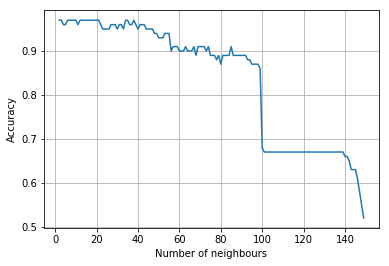

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
# load the iris data set
iris = datasets.load_iris()
knn_iris_acc = []
X = iris.data
y = iris.target

scale = MinMaxScaler()
X = scale.fit_transform(X)
for k in range(2, len(iris.data)):
    clf = KnnClassifier(k)
    clf.fit(X, y)
    iris_pred = []
    for x in X:
        pred = clf.predict(x)
        iris_pred.append(pred)
    iris_target_pred = np.array(iris_pred)
    knn_iris_acc.append(get_accuracy(iris_target_pred, iris.target))

plt.plot(range(2,len(iris.data)), knn_iris_acc)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.grid()
plt.show()